# ECMM422 Machine Learning
## Course Assessment 2

This course assessment (CA) represents 60% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the [College website](https://www.exeter.ac.uk/students/administration/complaintsandappeals/academicmisconduct/). 
Students are **not allowed** to use Large Language Models (such as ChatGPT, Claude, Gemini, etc) to generate code for the CA.


**Submission information:**
1. do not change the name of this notebook, i.e. the notebook file has to be: `ca2.ipynb`
2. do not add you name or student code in the notebook or in the file name
3. do not remove or delete or add any cell in this notebook
4. make sure to **remove** and **delete** the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave it in the cell you will fail the associated test
5. do not remove the function `save_history()` at the end of each cell. This function will save your edit operations on the code in the cell and will be used as proof of work, i.e. proof that you have been working on the questions assigned
6. work always in the cells provided when developing your implementation, i.e. do not work on another notebook or with programming environments that do not operate on this notebook.
7. when you are finished debugging **remove** all code that is not part of the function definition, i.e. leave only the clean function implementation in the cell: do not leave debugging `print` statements in the functions, and do not leave function invocations on test inputs
8. make sure that the execution of the cell **does not produce any type of output**: the execution of the cell should only define the desired functions
9. before the final submission run the function `check_and_prepare_for_submission()` in the last cell of the notebook: this function will create a zip archive called `ecmm422ca2.zip` which contains your notebook and the folder `proof_of_work`.
10. Submit only the file `ecmm422ca2.zip`


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- One or more hidden unit tests are going to evaluate if all desired properties of the required function are met. 
- If the function passes a test all the associated marks are awarded, if it fails 0 marks are awarded.
- If you make a typo error (e.g. misspelling a variable) this will likely causes a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.

Although the test use a hard fail/pass strategy to assign marks, the presence of several questions and several unit tests per question allows a fine grading. 

The Checkpoints are not graded by default, but might be used to assign additional marks in case the execution of the code obtains the desired results even when some tests might fail.

**Efficiency:** There is a cap of a few minutes on the execution of each cell and unit test. Make sure your code is not terribly inefficient (for example having a cell run for hours, e.g. using nested loops rather than NumPy functions that can work directly on  arrays), otherwise the execution of the cell/unit test will be interrupted and considered a failure. 

## Conventions and notation:

Do not assume any library is avaialble other than `matplotlib`, `numpy`, `scipy`.

Assume Python 3.8.

---

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

Make sure to convert numpy `matrix` objects to numpy arrays when returning a data matrix: only arrays are acceptable, not  numpy `matrix` objects. 

In the rest of the notebook, the term `vector` refers to a **one** dimensional numpy array. 

When we explicitly use the term `column vector` we mean a two dimensional array of shape `(n,1)`, when we explicitly use the term `row vector` we mean a two dimensional vector of shape `(1,n)`.

When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write often need to take in input and return as output such objects, i.e. numpy arrays, not python lists. Check the specifications for each required function in the question text. 

---

**Do not use library functions** to directly solve a question unless explicity instructed to do so. That is, when a required function can be implemented directly by a library function it is intended that the candidate should write their own implementation of the function: for example it the Question asks to implement a function to compute the `accuracy` one cannot just wrap the function `accuracy_score` from `sklearn.metrics` in a custom function; if a question asks to implement the K-nearest_neighbor algorithm one cannot just wrap the function `KNeighborsClassifier` from `sklearn.neighbors` in a custom function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.

---

You are asked to solve the quadratic optimization problem using the library [cvxopt](http://cvxopt.org/).  

You can install the library via:

`pip install cvxopt`

or

`conda install -c conda-forge cvxopt`

Then you should be able to import the module with:

    `import cvxopt`
  


In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp
import cvxopt
from submission_utils import save_history, check_and_prepare_for_submission
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Question 1

<div style="text-align: right"><b>[12 marks]</b></div>

**Sequence Generation and Perturbation**

**Objective:**
The objective of this section of the programming assignment is to implement various functions related to sequence generation, permutation, and perturbation. 

**Functions to Implement:**
1. `permute(seq)`
   - **Input:** `seq` - a sequence of characters
   - **Output:** A randomly permuted version of the input sequence `seq`

2. `generate_master_sequence(alphabet_size, seq_length, start_char=70)`
   - **Input:**
     - `alphabet_size`: Number of unique characters in the generated sequence
     - `seq_length`: Length of the generated sequence
     - `start_char`: ASCII value of the starting character in the sequence (default value is 70)
   - **Output:** A randomly generated master sequence of the specified length and alphabet size

3. `perturb(master_sequence, noise)`
   - **Input:**
     - `master_sequence`: The original sequence to be perturbed
     - `noise`: A float value indicating the degree of perturbation to apply to the sequence
   - **Output:** A perturbed version of the master sequence based on the specified noise level. To perturb a sequence you should repeatedly swap the position of two elements of the sequence at random. The parameter `noise` is a float that indicates the fraction of times that the swapping should take place. The actual number of times can be computed as `noise` * the number of elements of the input sequence. So if `noise=0.1` and the sequence has 200 elements, then the number of times that the swapping should take place is 20.

4. `randomize_length(seqs, endpoint_trim_dim)`
   - **Input:**
     - `seqs`: A list of sequences
     - `endpoint_trim_dim`: Maximum number of characters to trim from both ends of each sequence. A random number between 0 and `endpoint_trim_dim` is selected for
     -  each end.
   - **Output:** List of sequences with randomized lengths by trimming characters from both ends

5. `make_single_cluster_data(master_sequence, n_inliners, n_outliers, inliner_noise, outlier_noise, endpoint_trim_dim=None)`
   - **Input:**
     - `master_sequence`: The original sequence representing the cluster center
     - `n_inliners`: Number of inlier sequences to be generated
     - `n_outliers`: Number of outlier sequences to be generated
     - `inliner_noise`: Degree of noise to apply to inlier sequences
     - `outlier_noise`: Degree of noise to apply to outlier sequences
     - `endpoint_trim_dim`: Maximum number of characters to trim from both ends of each sequence (optional)
   - **Output:** List of sequences containing inliers and outliers generated based on the master sequence and noise parameters

6. `make_data(master_sequence, n_clusters, cluster_centres_noise, n_inliners, n_outliers, inliner_noise, outlier_noise, endpoint_trim_dim=None)`
   - **Input:**
     - `master_sequence`: The original sequence representing the cluster center
     - `n_clusters`: Number of clusters to generate
     - `cluster_centres_noise`: Degree of noise to apply to cluster center sequences
     - `n_inliners`: Number of inliers per cluster
     - `n_outliers`: Number of outliers per cluster
     - `inliner_noise`: Degree of noise to apply to inlier sequences
     - `outlier_noise`: Degree of noise to apply to outlier sequences
     - `endpoint_trim_dim`: Maximum number of characters to trim from both ends of each sequence (optional)
   - **Output:** Tuple containing:
     - `seqs`: List of sequences representing the generated data. The total number of sequences produced is `(n_inliners + n_outliers ) * n_clusters`.
     - `targets`: List of cluster labels corresponding to each sequence


**Notes:**
- The idea is to generate a master sequence of a certain lenght. This sequence has a random number of occurrences of `alphabet_size` distinct characters. This sequence will be used to generate all other sequences via perturbation.
- In `make_single_cluster_data`, the idea is to generate a number `n_inliners + n_outliers` of sequence derived from the `master_sequence` in input. The inlier will be only slighlty perturbed, while the outliers will be greatly perturbed (this is controlled by the respective noise parameters). Note that there is no other difference between the inliners and the outliers apart from the amount of perturbation applied. 
- In `make_data` the idea is to start from the `master_sequence` in input and then generate a number `n_clusters` of derived master sequences. These will be used to seed each cluster. These sequences are not totally dissimilar, instead they will be generated as perturbations of the original master sequence by applying an amount of noise equal to `cluster_centres_noise`. So if a small amount of noise is applied, the centers of the clusters will be very similar.


In [121]:
import random
    
def permute(seq: str) -> str:
    """   
    - **Input:** `seq` - a sequence of characters
    - **Output:** A randomly permuted version of the input sequence `seq`
    Clarification according to lecturer: 'sequences are strings'
    """
    # convert the sequence to a list
    seq_as_list = list(seq)
    # shuffle the list
    random.shuffle(seq_as_list)
    seq = "".join(seq_as_list)
    # assert type(seq) == str
    # re-form the string and return it
    return seq

def generate_master_sequence(alphabet_size: int, seq_length: int, start_char: int=70) -> str:
    """   
    - **Input:**
        - `alphabet_size`: Number of unique characters in the generated sequence
        - `seq_length`: Length of the generated sequence
        - `start_char`: ASCII value of the starting character in the sequence (default value is 70)
    - **Output:** A randomly generated master sequence of the specified length and alphabet size

    Example: Say you start from the character corresponding to 'A' , say the alphabet_size is 3, 
    say the seq_length is 10, then you want to generate something like: AABCCBCBAC
    """
    # ascii_values corresponding to our alphabet
    ascii_values = [start_char + i for i in range(alphabet_size)]
    # choose seq_length random ascii_values from our alphabet
    randomly_chosen_ascii_values = random.choices(ascii_values, k=seq_length)
    # convert from ascii values to a string
    master_seq = "".join([chr(i) for i in randomly_chosen_ascii_values])
    # assert type(master_seq) == str
    # assert len(master_seq) == seq_length
    return master_seq
    
def perturb(master_sequence: str, noise: float) -> str:
    """   
    - **Input:**
        - `master_sequence`: The original sequence to be perturbed
        - `noise`: A float value indicating the degree of perturbation to apply to the sequence
    - **Output:** A perturbed version of the master sequence based on the specified noise level. 

    To perturb a sequence you should repeatedly swap the position of two elements of the sequence at random. 
    The parameter `noise` is a float that indicates the fraction of times that the swapping should take place. 
    The actual number of times can be computed as `noise` * the number of elements of the input sequence. 
    So if `noise=0.1` and the sequence has 200 elements, then the number of times that the swapping should take place is 20.

    Clarifications: 
    Q: For situations where the noise amount leads to a number of swaps which is not whole, ex: 0.25 noise for a sequence length of 10 yields 2.5 swaps or 0.1 
    for a sequence length of 9 gives 0.9 swaps, are we rounding up or down the number of swaps? So we would have either 3 and 1 swaps or 2 and 0 swaps respectively.
    A: As this is not specified, any reasonable choice is allowed.
    """
    # compute the number of swaps
    nb_of_swaps = int(np.ceil(len(master_sequence) * noise))
    # convert the master sequence to a list
    master_sequence_as_list = list(master_sequence)
    # perform the swaps
    for _ in range(nb_of_swaps):
        # randomly select the index of two positions to swap
        idx1, idx2 = random.sample(list(range(len(master_sequence_as_list))), k = 2)
        # swap them
        chr_idx1, chr_idx2 = master_sequence_as_list[idx1], master_sequence_as_list[idx2]
        master_sequence_as_list[idx1], master_sequence_as_list[idx2] = chr_idx2, chr_idx1
    # assert type("".join(master_sequence_as_list)) == str
    return "".join(master_sequence_as_list)

def randomize_length(seqs: list, endpoint_trim_dim: int) -> list:
    """   
    - **Input:**
        - `seqs`: A list of sequences
        - `endpoint_trim_dim`: Maximum number of characters to trim from both ends of each sequence. A random number between 0 and `endpoint_trim_dim` is selected for each end.
    - **Output:** List of sequences with randomized lengths by trimming characters from both ends
    Clarifications according to the lecturer: 'include 0 and the value specified in endpoint_trim_dim', 'No requirement to check. 
    Assume length will be always much greater than trimming values.', 'assume a non adversarial setting'
    """
    for i, seq in enumerate(seqs):
        # convert the sequence to a list
        seq_as_list = list(seq)
        # number of characters to trim at the start
        nb_to_trim_at_start = random.sample(list(range(endpoint_trim_dim+1)), k = 1)[0]
        # number of characters to trim at the end
        nb_to_trim_at_end = random.sample(list(range(endpoint_trim_dim+1)), k = 1)[0]
        # trimmed sequence
        seqs[i] = "".join(seq_as_list[nb_to_trim_at_start:(len(seq_as_list)-nb_to_trim_at_end)])
    # assert type(seqs) == list
    # assert type(seqs[0]) == str
    return seqs

def make_single_cluster_data(master_sequence: str, n_inliners: int, n_outliers: int, inliner_noise: float, outlier_noise: float, endpoint_trim_dim: int=None) -> list:
    """   
    - **Input:**
        - `master_sequence`: The original sequence representing the cluster center
        - `n_inliners`: Number of inlier sequences to be generated
        - `n_outliers`: Number of outlier sequences to be generated
        - `inliner_noise`: Degree of noise to apply to inlier sequences
        - `outlier_noise`: Degree of noise to apply to outlier sequences
        - `endpoint_trim_dim`: Maximum number of characters to trim from both ends of each sequence (optional)
    - **Output:** List of sequences containing inliers and outliers generated based on the master sequence and noise parameters

    The idea is to generate a number `n_inliners + n_outliers` of sequence derived from the `master_sequence` in input. 
    The inlier will be only slighlty perturbed, while the outliers will be greatly perturbed (this is controlled by the respective noise parameters). 
    Note that there is no other difference between the inliners and the outliers apart from the amount of perturbation applied. 
    """
    # inliners
    inliers = [perturb(master_sequence=master_sequence, noise=inliner_noise) for _ in range(n_inliners)]
    # outliers
    outliers = [perturb(master_sequence=master_sequence, noise=outlier_noise) for _ in range(n_outliers)]
    # the data
    data = inliers + outliers   
    # if endpoint_trim_dim is not None then trim the data
    if endpoint_trim_dim != None:
        data = randomize_length(seqs=data, endpoint_trim_dim=endpoint_trim_dim)
        # assert type(data) == list
        # assert type(data[0]) == str
        return data
    else:
        # assert type(data) == list
        # assert type(data[0]) == str
        return data

def make_data(master_sequence: str, n_clusters: int, cluster_centres_noise: float, n_inliners: int, n_outliers: int, inliner_noise: float, outlier_noise: float, endpoint_trim_dim: int=None) -> tuple:
    """
    - **Input:**
        - `master_sequence`: The original sequence representing the cluster center
        - `n_clusters`: Number of clusters to generate
        - `cluster_centres_noise`: Degree of noise to apply to cluster center sequences
        - `n_inliners`: Number of inliers per cluster
        - `n_outliers`: Number of outliers per cluster
        - `inliner_noise`: Degree of noise to apply to inlier sequences
        - `outlier_noise`: Degree of noise to apply to outlier sequences
        - `endpoint_trim_dim`: Maximum number of characters to trim from both ends of each sequence (optional)
    - **Output:** Tuple containing:
        - `seqs`: List of sequences representing the generated data. The total number of sequences produced is `(n_inliners + n_outliers ) * n_clusters`.
        - `targets`: Vector of cluster labels.

    The idea is to start from the `master_sequence` in input and then generate a number `n_clusters` of derived master sequences. 
    These will be used to seed each cluster. These sequences are not totally dissimilar, instead they will be generated as perturbations of the original master 
    sequence by applying an amount of noise equal to `cluster_centres_noise`. So if a small amount of noise is applied, 
    the centers of the clusters will be very similar.

    Clarification: for class labels, 'start from 0 and go up in increments of 1'.
    """

    # generate the cluster centres
    cluster_centres = [perturb(master_sequence=master_sequence, noise=cluster_centres_noise) for _ in range(n_clusters)]
    seqs = []
    targets = []
    # generate the sequences for each cluster and the target vector
    for i, cluster_centre in enumerate(cluster_centres):
        seqs += make_single_cluster_data(
            master_sequence=cluster_centre, 
            n_inliners=n_inliners, 
            n_outliers=n_outliers, 
            inliner_noise=inliner_noise, 
            outlier_noise=outlier_noise, 
            endpoint_trim_dim=endpoint_trim_dim 
        )
        targets += [i for _ in range(n_inliners+n_outliers)]


    # assert len(targets) == int((n_inliners + n_outliers) * n_clusters)
    # assert type(targets) == list
    # assert type(np.array(targets)) == type(np.array([]))

    # assert len(seqs) == int((n_inliners + n_outliers) * n_clusters)
    # assert type(seqs) == list
    # assert type(seqs[0]) == str

    return seqs, np.array(targets)

save_history()

In [122]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [123]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [124]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [125]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [126]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [127]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2

<div style="text-align: right"><b>[8 marks]</b></div>

**Histogram Vectorizer and PCA Plotter**

**Objective:**
The objective of this section of the programming assignment is to implement various functions related to data preprocessing and visualization. Specifically, the candidate needs to implement a histogram vectorizer to convert sequences into numerical representations and a PCA plotter to visualize high-dimensional data in two dimensions.

**Functions to Implement:**

1. `histogram_vectorizer(seqs)`
   - **Input:** 
     - `seqs`: A list of sequences (strings)
   - **Output:** 
     - A matrix where each row represents the histogram vectorized representation of a sequence in the input list.
   - **Description:** 
     - This function takes a list of sequences as input and converts each sequence into a histogram vectorized representation. It utilizes inner functions to facilitate the conversion process.

2. `pca_plot(X, y=None)`
   - **Input:** 
     - `X`: Data matrix where each row represents a sample and each column represents a feature.
     - `y` (optional): Labels corresponding to each sample for color-coding in the plot.
   - **Output:** 
     - A scatter plot visualizing the input data points after performing PCA (Principal Component Analysis) to reduce dimensionality to 2D.
   - **Description:** 
     - This function takes a data matrix `X` and performs PCA to reduce the dimensionality to 2D. It then generates a scatter plot to visualize the data points. If labels `y` are provided, data points will be color-coded based on the labels.

**Notes:**
- Implement the inner functions (`convert_to_int_sequence` and `single_histogram_vectorizer`) within the `histogram_vectorizer` function.
- Ensure that the implemented functions conform to the specified signatures and requirements.
- Use appropriate libraries and data structures to efficiently implement the functions.
- Validate the correctness and functionality of each function thoroughly.
- Include comments and docstrings to explain the purpose and functionality of each function.
- Consider edge cases and handle exceptions gracefully.


In [128]:
def histogram_vectorizer(seqs: list) -> np.ndarray:
    """
    - **Input:** 
        - `seqs`: A list of sequences (strings)
    - **Output:** 
        - A matrix where each row represents the histogram vectorized representation of a sequence in the input list.
    - **Description:** 
        - This function takes a list of sequences as input and converts each sequence into a histogram vectorized representation. 
        It utilizes inner functions to facilitate the conversion process.
    Clarifications from the lecturer: 'ignore the text in Notes'.
    """
    def convert_to_int_sequence(seq: str) -> list:
        """
        - **Input:**
            - `seq`: A sequence (string)
        - **Output**
            - A list where the elements are the ASCII values of the characters in the string
        """
        return [ord(c) for c in seq]
    # assert convert_to_int_sequence("F") == [70]

    # convert all sequences in seqs to lists of integers
    int_seqs = [convert_to_int_sequence(seq=seq) for seq in seqs]
    # obtain the maximum integer value in int_seqs
    int_seq_max = max(max(seq) for seq in int_seqs)
    # obtain the minimum integer value in int_seqs
    int_seq_min = min(min(seq) for seq in int_seqs)

    def single_histogram_vectorizer(int_seq):
        """
        - **Input:**
            - `int_seq`: A list of integers.
        - **Output:**
            - `single_hist`: Histogram representation of `int_seq`
        """
        single_hist = np.zeros(int_seq_max - int_seq_min + 1)
        for i in int_seq:
            single_hist[i - int_seq_min] += 1
        return single_hist
    
    # obtain a matrix of histogram representations for all sequences in seqs
    histogram = np.zeros(int_seq_max - int_seq_min + 1)
    for int_seq in int_seqs:
        histogram = np.vstack((histogram, single_histogram_vectorizer(int_seq=int_seq)))

    # assert type(histogram[1:, :]) == type(np.array([]))
    # assert type(histogram[1:, :][0]) == type(np.array([]))
    return histogram[1:, :]

from sklearn.decomposition import PCA

def pca_plot(X: np.ndarray, y: np.ndarray=None):
    """   
    - **Input:** 
        - `X`: Data matrix where each row represents a sample and each column represents a feature.
        - `y` (optional): Labels corresponding to each sample for color-coding in the plot.
    - **Output:** 
        - A scatter plot visualizing the input data points after performing PCA (Principal Component Analysis) to reduce dimensionality to 2D.
    - **Description:** 
        - This function takes a data matrix `X` and performs PCA to reduce the dimensionality to 2D. 
        It then generates a scatter plot to visualize the data points. If labels `y` are provided, data points will be color-coded based on the labels.
    Clarifications: 'It is enough to call plt.show() at the end of the plotting functions.'
    """
    X = np.array(X)
    fig, ax = plt.subplots()
    pca = PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)

    if y is not None:
        y = np.array(y)
        class_labels = set(y)
        if len(class_labels) == 2:
            c = ["blue", "red"]
            for i, class_label in enumerate(class_labels):
                pca1 = X[y == class_label][:,0]
                pca2 = X[y == class_label][:,1]
                ax.scatter(pca1, pca2, label=f'Class {class_label}', color=c[i])
        else:
            for i, class_label in enumerate(class_labels):
                pca1 = X[y == class_label][:,0]
                pca2 = X[y == class_label][:,1]
                ax.scatter(pca1, pca2, label=f'Class {class_label}')
        # Adding legend
        ax.legend()
    else:
        ax.scatter(X[:,0], X[:,1])
    plt.show()


save_history()

In [129]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [130]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
master_sequence = generate_master_sequence(alphabet_size=4, seq_length=150, start_char=68)
n_instances = 200
n_outliers = n_instances//9
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=2,
    cluster_centres_noise=.5,
    n_inliners=n_inliners, 
    n_outliers=0, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=15)

X = histogram_vectorizer(seqs)
pca_plot(X, y=targets)
```

and check that you obtain a plot similar to:

<img src="img0.png" width=40%>


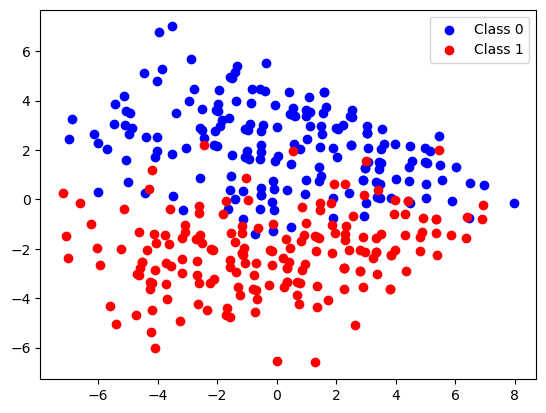

In [131]:
master_sequence = generate_master_sequence(alphabet_size=4, seq_length=150, start_char=68)
n_instances = 200
n_outliers = n_instances//9
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=2,
    cluster_centres_noise=.5,
    n_inliners=n_inliners, 
    n_outliers=0, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=15)
X = histogram_vectorizer(seqs)
pca_plot(X, y=targets)

## Question 3

<div style="text-align: right"><b>[20 marks]</b></div>

**Adaptive Boosting (AdaBoost) and Random Forest Classification**

**Objective:**
The objective of this section of the programming assignment is to implement two ensemble learning methods: Adaptive Boosting (AdaBoost) and Random Forest Classification. The candidate will implement functions for training and testing these ensemble models using decision tree classifiers. As an auxiliary process implement also a function for creating a bootstrapped replicate of a given dataset and extracting the out-of-bag (OOB) instances.

**Functions to Implement:**

1. `train_ab(X_train, y_train, param)`
   - **Input:**
     - `X_train`: Training feature matrix
     - `y_train`: Training labels
     - `param`: Maximum depth of decision trees used in the ensemble
   - **Output:**
     - List of tuples containing the learned models and their corresponding weights.
   - **Description:**
     - Trains an AdaBoost ensemble model using decision tree classifiers as base learners. The function iteratively updates the weights of the training instances based on their performance and combines multiple weak learners into a strong learner.

2. `test_ab(X_test, models)`
   - **Input:**
     - `X_test`: Test feature matrix
     - `models`: List of tuples containing the learned models and their corresponding weights obtained from `train_ab` function
   - **Output:**
     - Predicted labels for the test data.
   - **Description:**
     - Makes predictions on the test data using the trained AdaBoost ensemble model.

3. **`AdaBoostClassifier` Class:**
   - **Attributes:**
     - `max_depth`: Maximum depth of decision trees to be used as base classifiers.
     - `models`: List to store the trained AdaBoost models.
   - **Methods:**
     - `__init__(self, max_depth=1)`: Constructor method to initialize the AdaBoost classifier with a specified maximum depth.
     - `fit(self, X, y)`: Method to train the AdaBoost classifier on the input training data `X` and labels `y`.
     - `predict(self, X)`: Method to predict labels for the input data `X` using the trained AdaBoost classifier.
   - **Description:**
     - The `AdaBoostClassifier` class should use the previous functions `train_ab` and `test_ab`. 
     
**Notes:**
- You can use as weak learner the class `DecisionTreeClassifier` from `sklearn`.
- You must provide your own implementation of the boosting algorithm i.e. you cannot use `AdaBoostClassifier` from `sklearn` in your code.
- `param` is an integer representing the maximum depth of decision trees

4. `make_bootstrap(data_matrix, targets)`
   - **Input:**
     - `data_matrix`: Input data matrix where each row represents an instance and each column represents a feature.
     - `targets`: Target vector containing the labels corresponding to each instance in the data matrix.
   - **Output:**
     - `bootstrap_data_matrix`: Bootstrapped replicate of the input data matrix.
     - `bootstrap_targets`: Bootstrapped replicate of the target vector.
     - `bootstrap_sample_ids`: Vector containing the instance indices of the bootstrapped replicate of the data matrix.
     - `oob_data_matrix`: Data matrix containing the out-of-bag instances.
     - `oob_targets`: Target vector containing the labels of the out-of-bag instances.
     - `oob_samples_ids`: Vector containing the instance indices of the out-of-bag instances.
   - **Description:**
     - Generates a bootstrapped replicate of the input dataset by sampling instances with replacement. The function then extracts the out-of-bag instances which are not included in the bootstrapped replicate.


5. `train_rfc(X_train, y_train, param)`
   - **Input:**
     - `X_train`: Training feature matrix
     - `y_train`: Training labels
     - `param`: Maximum depth of decision trees used in the ensemble
   - **Output:**
     - List of trained decision tree classifiers representing the Random Forest ensemble.
   - **Description:**
     - Trains a Random Forest ensemble model using multiple decision tree classifiers. Each decision tree is trained on a bootstrapped sample of the training data.

6. `test_rfc(X_test, models)`
   - **Input:**
     - `X_test`: Test feature matrix
     - `models`: List of trained decision tree classifiers obtained from `train_rfc` function
   - **Output:**
     - Predicted labels for the test data.
   - **Description:**
     - Makes predictions on the test data using the trained Random Forest ensemble model.

7. **`RandomForestClassifier` Class:**
   - **Attributes:**
     - `max_depth`: Maximum depth of decision trees to be used as base classifiers.
     - `models`: List to store the trained decision tree models representing the Random Forest.
   - **Methods:**
     - `__init__(self, max_depth=1)`: Constructor method to initialize the Random Forest classifier with a specified maximum depth.
     - `fit(self, X, y)`: Method to train the Random Forest classifier on the input training data `X` and labels `y`.
     - `predict(self, X)`: Method to predict labels for the input data `X` using the trained Random Forest classifier.
   - **Description:**
     - The `RandomForestClassifier` class should use the previous functions `train_rfc` and `test_rfc`.

**Notes:**
- In your implementation of the Random Forest, you can use as decision tree the class `DecisionTreeClassifier` from `sklearn`.
- You must provide your own implementation of the bagging algorithm i.e. you cannot use `RandomForestClassifier` from `sklearn` in your code.
- `param` is an integer representing the maximum depth of decision trees


In [132]:
from sklearn.tree import DecisionTreeClassifier

def train_ab(X_train: np.ndarray, y_train: np.ndarray, param: int) -> list:
    """   
    - **Input:**
        - `X_train`: Training feature matrix
        - `y_train`: Training labels
        - `param`: Maximum depth of decision trees used in the ensemble
    - **Output:**
        - List of tuples containing the learned models and their corresponding weights.
    - **Description:**
        - Trains an AdaBoost ensemble model using decision tree classifiers as base learners. 
        The function iteratively updates the weights of the training instances based on their performance and combines multiple weak learners into a strong learner.
    Clarification: 'in Question 3 the number of weak learners for AdaBoost and the number of Decision Trees for Random Forest should be 100.'
    """
    # make sure y_train is a numpy array
    y_train = np.array(y_train)
    X_train = np.array(X_train)
    models = []
    model_weights = []
    # initialise the sample weights
    sample_weights = np.ones(len(y_train)) / len(y_train)

    # generate 100 adaboost decision trees
    for _ in range(100):
        # initialise the adaboost decision tree
        clf = DecisionTreeClassifier(max_depth=param).fit(X_train, y_train, sample_weight=sample_weights)
        # obtain the predictions
        preds = clf.predict(X_train)
        # calculate the weighted error
        accs = sample_weights[y_train==preds]
        acc = np.sum(accs)/np.sum(sample_weights)
        error = 1.0 - acc
        # calculate that decision tree's weight
        model_weight = 0.5 * np.log((1 - error) / error)
        # update the sample weights
        sample_weights = sample_weights * np.exp(model_weight * (preds != y_train))
        sample_weights /= np.sum(sample_weights)
        # append the decision tree to the models list
        models.append(clf)
        # append the decision tree's weight to the model_weights list
        model_weights.append(model_weight)

    models_and_weights = list(zip(models, model_weights))
    # assert type(models_and_weights) == list
    # assert type(models_and_weights[0]) == tuple
    # assert isinstance(models_and_weights[0][0], DecisionTreeClassifier)
    # assert len(models_and_weights[0]) == 2
    return models_and_weights


def test_ab(X_test: np.ndarray, models: list) -> np.ndarray:
    """
    - **Input:**
        - `X_test`: Test feature matrix
        - `models`: List of tuples containing the learned models and their corresponding weights obtained from `train_ab` function
    - **Output:**
        - Predicted labels for the test data.
    - **Description:**
        - Makes predictions on the test data using the trained AdaBoost ensemble model.
    """
    X_test = np.array(X_test)
    # obtain the number of classes 
    num_classes = len(models[0][0].classes_)
    # obtain the classes
    classes = models[0][0].classes_
    # initialise a total_weights matrix in which we will store the weighted votes for each class
    total_weights = np.zeros((X_test.shape[0], num_classes))
    # obtain the predictions for each decision tree in the models list and update the total_weights matrix accordingly
    for model, model_weight in models:
        preds = model.predict(X_test)
        for c in classes:
            idx = np.where(preds == c)
            total_weights[idx, list(classes).index(c)] += model_weight
    # deal with ties by randomly breaking them
    max_indices = np.argmax(total_weights, axis=1)
    for i, row in enumerate(total_weights):
        max_value = np.max(row)
        max_indices_row = np.where(row == max_value)[0]
        if len(max_indices_row) > 1:
            chosen_index = np.random.choice(max_indices_row)
            max_indices[i] = chosen_index

    predictions = np.array(classes[max_indices])
    # assert type(predictions) == type(np.array([]))
    return predictions

    
class AdaBoostClassifier():
    """   
    - **Attributes:**
        - `max_depth`: Maximum depth of decision trees to be used as base classifiers.
        - `models`: List to store the trained AdaBoost models.
    - **Methods:**
        - `__init__(self, max_depth=1)`: Constructor method to initialize the AdaBoost classifier with a specified maximum depth.
        - `fit(self, X, y)`: Method to train the AdaBoost classifier on the input training data `X` and labels `y`.
        - `predict(self, X)`: Method to predict labels for the input data `X` using the trained AdaBoost classifier.
    - **Description:**
        - The `AdaBoostClassifier` class should use the previous functions `train_ab` and `test_ab`.
     """
    def __init__(self, max_depth:int = 1) -> None:
        """
        - **Inputs:**
            - `max_depth`: maximum depths of the decision trees that make up the AdaBoost ensemble
        """
        # initialise the required attributes
        self.max_depth = max_depth
        self.models = []
        # additionally initialises a classes_ attribute which will store the class labels
        # self.classes_ = []
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        - **Inputs:**
            - `X`: Feature matrix
            - `y`: Target vector
        - **Description:**
            - Method to train the AdaBoost classifier on the input training data `X` and labels `y`   
        """
        y = np.array(y)
        self.models = train_ab(X_train=X, y_train=y, param=self.max_depth)
        # assert type(self.models) == list
        # assert type(self.models[0]) == tuple
        # assert isinstance(self.models[0][0], DecisionTreeClassifier)
        # self.classes_ = self.models[0][0].classes_
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        - **Inputs:**
            - `X`: Feature matrix
        - **Description:**
            - Method to predict labels for the input data `X` using the trained AdaBoost classifier. 
        """
        preds = test_ab(X_test=X, models=self.models)
        # assert type(preds) == type(np.array([]))
        return preds


def make_bootstrap(data_matrix: np.ndarray, targets: np.ndarray):
    """
    - **Input:**
        - `data_matrix`: Input data matrix where each row represents an instance and each column represents a feature.
        - `targets`: Target vector containing the labels corresponding to each instance in the data matrix.
    - **Output:**
        - `bootstrap_data_matrix`: Bootstrapped replicate of the input data matrix.
        - `bootstrap_targets`: Bootstrapped replicate of the target vector.
        - `bootstrap_sample_ids`: Vector containing the instance indices of the bootstrapped replicate of the data matrix.
        - `oob_data_matrix`: Data matrix containing the out-of-bag instances.
        - `oob_targets`: Target vector containing the labels of the out-of-bag instances.
        - `oob_samples_ids`: Vector containing the instance indices of the out-of-bag instances.
    - **Description:**
        - Generates a bootstrapped replicate of the input dataset by sampling instances with replacement. 
        The function then extracts the out-of-bag instances which are not included in the bootstrapped replicate.
    """
    data_matrix = np.array(data_matrix)
    n = len(targets)
    # convert the targets to a numpy array
    targets = np.array(targets)
    # generate the indices of the bootstrap samples
    bootstrap_sample_ids = np.random.choice(n, size=n, replace=True)
    # obtain the indices of the out_of_bag samples
    oob_samples_ids = np.array(list(set(list(range(n))) ^ set(bootstrap_sample_ids)))
    # obtain the bootstrap samples
    bootstrap_data_matrix = data_matrix[bootstrap_sample_ids]
    # obtain the out-of-bag samples
    oob_data_matrix = data_matrix[oob_samples_ids]
    # obtain the bootstrap targets
    bootstrap_targets = targets[bootstrap_sample_ids]
    # obtain the out-of-bag targets
    oob_targets = targets[oob_samples_ids]

    # assert type(bootstrap_sample_ids) == type(np.array([]))
    # assert type(bootstrap_targets) == type(np.array([]))
    # assert type(bootstrap_data_matrix) == type(np.array([]))
    # assert type(oob_data_matrix) == type(np.array([]))
    # assert type(oob_targets) == type(np.array([]))
    # assert type(oob_samples_ids) == type(np.array([]))
    # assert len(np.unique(bootstrap_sample_ids)) + len(np.unique(oob_samples_ids)) == len(targets)
    # assert len(set(bootstrap_sample_ids) & set(oob_samples_ids)) == 0

    return bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, oob_data_matrix, oob_targets, oob_samples_ids


def train_rfc(X_train: np.ndarray, y_train: np.ndarray, param: int) -> list:
    """   
    - **Input:**
        - `X_train`: Training feature matrix
        - `y_train`: Training labels
        - `param`: Maximum depth of decision trees used in the ensemble
    - **Output:**
        - List of trained decision tree classifiers representing the Random Forest ensemble.
    - **Description:**
        - Trains a Random Forest ensemble model using multiple decision tree classifiers. Each decision tree is trained on a bootstrapped sample of the training data.
    Clarification: 'in Question 3 the number of weak learners for AdaBoost and the number of Decision Trees for Random Forest should be 100.'
    """
    models = []
    y_train = np.array(y_train)
    X_train = np.array(X_train)
    # generate 100 random forest decision trees via bootstrapping the input data
    for _ in range(100):
        bootstrap_object = make_bootstrap(data_matrix=X_train, targets=y_train)
        # store the decision tree generated via bootstramp sampling
        clf = DecisionTreeClassifier(max_depth=param).fit(bootstrap_object[0], bootstrap_object[1])
        models.append(clf)
    # assert type(models) == list
    # assert isinstance(models[0], DecisionTreeClassifier)
    return models

def test_rfc(X_test: np.ndarray, models: list) -> np.ndarray:
    """   
    - **Input:**
        - `X_test`: Test feature matrix
        - `models`: List of trained decision tree classifiers obtained from `train_rfc` function
    - **Output:**
        - Predicted labels for the test data.
    - **Description:**
        - Makes predictions on the test data using the trained Random Forest ensemble model.
    """
    X_test = np.array(X_test)
    # number of classes
    num_classes = len(models[0].classes_)
    # class labels
    classes = models[0].classes_
    # total predictions matrix to store the votes each test sample gets for each class
    total_preds = np.zeros((X_test.shape[0], num_classes))
    # obtain the predictions for each that makes up the random forest and update the total_preds matrix accordingly
    for model in models:
        preds = model.predict(X_test)
        for c in classes:
            idx = np.where(preds == c)
            total_preds[idx, list(classes).index(c)] += 1
    # dealing with ties by randomly breaking them
    max_indices = np.argmax(total_preds, axis=1)
    for i, row in enumerate(total_preds):
        max_value = np.max(row)
        max_indices_row = np.where(row == max_value)[0]
        if len(max_indices_row) > 1:
            chosen_index = np.random.choice(max_indices_row)
            max_indices[i] = chosen_index
    # obtaining the predictions
    preds = classes[max_indices]
    # assert type(preds) == type(np.array([]))
    return preds

class RandomForestClassifier():
    """
    - **Attributes:**
        - `max_depth`: Maximum depth of decision trees to be used as base classifiers.
        - `models`: List to store the trained decision tree models representing the Random Forest.
    - **Methods:**
        - `__init__(self, max_depth=1)`: Constructor method to initialize the Random Forest classifier with a specified maximum depth.
        - `fit(self, X, y)`: Method to train the Random Forest classifier on the input training data `X` and labels `y`.
        - `predict(self, X)`: Method to predict labels for the input data `X` using the trained Random Forest classifier.
    - **Description:**
        - The `RandomForestClassifier` class should use the previous functions `train_rfc` and `test_rfc`.
    """
    
    def __init__(self, max_depth:int = 1) -> None:
        """
        - **Inputs:**
            - `max_depth`: maximum depths of the decision trees that make up the adaboost ensemble
        """
        # initialise the required attributes
        self.max_depth = max_depth
        self.models = []
        # additionally initialises a classes_ attribute which will store the class labels
        # self.classes_ = []

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        - **Inputs:**
            - `X`: Feature matrix
            - `y`: Target vector
        - **Description:**
            - Method to train the RandomForest classifier on the input training data `X` and labels `y`   
        """
        y = np.array(y)
        self.models = train_rfc(X_train=X, y_train=y, param=self.max_depth)
        # assert type(self.models) == list
        # assert isinstance(self.models[0], DecisionTreeClassifier)
        # self.classes_ = self.models[0].classes_

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        - **Inputs:**
            - `X`: Feature matrix
        - **Description:**
            - Method to predict labels for the input data `X` using the trained RandomForest classifier. 
        """
        preds = test_rfc(X_test=X, models=self.models)
        # assert type(preds) == type(np.array([]))
        return preds

save_history()

In [133]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [134]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [135]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [136]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [137]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [138]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 4

<div style="text-align: right"><b>[10 marks]</b></div>


**One-vs-One (OvO) Classification**


**Objective:** The objective of this assignment is to implement a One-vs-One (OvO) classifier along with supporting functions for training and testing.

**Functions to Implement:**

1. `train_OvO(X_train, y_train, estimator)`
   - **Inputs:**
     - `X_train`: Feature matrix of shape `(n_samples, n_features)` representing the training data.
     - `y_train`: Array of labels of shape `(n_samples,)` representing the training labels.
     - `estimator`: The base estimator used for training the OvO classifier.
   - **Output:**
     - `estimators`: A dictionary containing the trained binary classifiers for each pair of classes.

2. `test_OvO(X_test, estimators)`
   - **Inputs:**
     - `X_test`: Feature matrix of shape `(n_samples, n_features)` representing the test data.
     - `estimators`: A dictionary containing the trained binary classifiers for each pair of classes.
   - **Output:**
     - `preds`: Predicted labels for the test data.

3. `OVOClassifier` class
   - **Attributes:**
     - `estimator`: The base estimator to be used for training the OvO classifier.
     - `estimators`: A dictionary containing the trained binary classifiers for each pair of classes.
   - **Methods:**
     - `__init__(self, estimator)`: Constructor method to initialize the OvO classifier with a specified base estimator.
     - `fit(self, X, y)`: Method to train the OvO classifier on the input training data `X` and labels `y`.
     - `predict(self, X)`: Method to predict labels for the input data `X` using the trained OvO classifier.

**Requirements:**
- The `train_OvO` function should train binary classifiers for all pairs of classes using the specified base estimator.
- The `test_OvO` function should perform predictions using the trained binary classifiers for all pairs of classes and combine the results using majority voting.
- The `OVOClassifier` class should provide a wrapper for training and testing the OvO classifier using the specified base estimator.


In [139]:
import copy 

def train_OvO(X_train: np.ndarray, y_train: np.ndarray, estimator) -> dict:
    """   
    - **Inputs:**
        - `X_train`: Feature matrix of shape `(n_samples, n_features)` representing the training data.
        - `y_train`: Array of labels of shape `(n_samples,)` representing the training labels.
        - `estimator`: The base estimator used for training the OvO classifier.
    - **Output:**
        - `estimators`: A dictionary containing the trained binary classifiers for each pair of classes.
    Clarifications: 'Apologies, you are correct, I have given a wrong suggestion in the previous answer.
    Indeed you have to pass an already initialised estimator object so that it is possible to set its parameters.'
    """
    # convert X_train and y_train to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    # obtain the class labels
    classes = list(set(y_train))
    # initialise the estimators dictionary
    estimators = {}
    # get the unique class pairings and store them as the keys of the estimators dictionary
    for j, cj in enumerate(classes):
        for i, ci in enumerate(classes):
            if cj == ci:
                continue
            if (cj, ci) in estimators.keys() or (ci, cj) in estimators.keys():
                continue
            else:
                estimators[(cj, ci)] = None
    # training a separate estimator for each of the class pairs and storing it in the 
    # estimators at the relevant key
    for class_pair in estimators.keys():
        new_y = y_train.copy()
        new_X = X_train.copy()
        new_X = X_train[(new_y == class_pair[0]) | (new_y == class_pair[1])]
        new_y = new_y[(new_y == class_pair[0]) | (new_y == class_pair[1])]
        est = copy.copy(estimator)
        est.fit(new_X, new_y)
        estimators[class_pair] = est
    # assert type(estimators) == dict
    # assert type(list(estimators.keys())[0]) == tuple
    # assert type(list(estimators.values())[0]) == type(estimator)
    return estimators

def test_OvO(X_test: np.ndarray, estimators: list) -> np.ndarray:
    """   
    - **Inputs:**
        - `X_test`: Feature matrix of shape `(n_samples, n_features)` representing the test data.
        - `estimators`: A dictionary containing the trained binary classifiers for each pair of classes.
    - **Output:**
        - `preds`: Predicted labels for the test data.
    """
    X_test = np.array(X_test)
    # retrieve the class labels
    classes = []
    for key in estimators.keys():
        for c in key:
            if c not in classes:
                classes.append(c)
    classes = np.sort(classes)
    # initialise the preds array
    preds = np.zeros(len(X_test))
    # initialise the list which will store the predictions from each model in estimators
    preds_array = []
    for est in estimators.values():
        preds_array.append(est.predict(X_test))
    # obtain the final predictions
    for i in range(len(X_test)):
        pred_dict = {c:0 for c in classes}
        for pred_array in preds_array:
            pred_dict[pred_array[i]] += 1
        # deal with tie breaks by randomly breaking them
        max_value = max(pred_dict.values())
        keys_with_max_value = [key for key, value in pred_dict.items() if value == max_value]
        preds[i] = np.random.choice(keys_with_max_value)
    # assert type(preds) == type(np.array([]))
    return preds
    
class OVOClassifier():
    """       
    - **Attributes:**
        - `estimator`: The base estimator to be used for training the OvO classifier.
        - `estimators`: A dictionary containing the trained binary classifiers for each pair of classes.
    - **Methods:**
        - `__init__(self, estimator)`: Constructor method to initialize the OvO classifier with a specified base estimator.
        - `fit(self, X, y)`: Method to train the OvO classifier on the input training data `X` and labels `y`.
        - `predict(self, X)`: Method to predict labels for the input data `X` using the trained OvO classifier.
    """
    def __init__(self, estimator) -> None:
        self.estimator = estimator
        self.estimators = {}
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        X = np.array(X)
        y = np.array(y)
        self.estimators = train_OvO(X_train=X, y_train=y, estimator=self.estimator)
        # assert type(self.estimators) == dict
        # assert type(list(self.estimators.keys())[0]) == tuple
        # assert type(list(self.estimators.values())[0]) == type(self.estimator)

    def predict(self, X: np.ndarray) -> np.ndarray:
        preds = test_OvO(X_test=X, estimators=self.estimators)
        # assert type(preds) == type(np.array([]))
        return preds

save_history()

In [140]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [141]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [142]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 5

<div style="text-align: right"><b>[5 marks]</b></div>


**Learning Curve Analysis**

**Objective:**
The objective of this assignment is to implement functions for analyzing learning curves in machine learning. The candidate will implement functions for computing learning curves and visualizing them using matplotlib.

**Functions to Implement:**

1. `compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions)`
   - **Input:**
     - `train_func`: Function for training a machine learning model
     - `test_func`: Function for testing a machine learning model
     - `param`: Parameters for the training function
     - `X`: Feature matrix
     - `y`: Target labels
     - `test_size`: Size of the test set (as a percentage of the dataset)
     - `n_steps`: Number of steps for increasing the training set size
     - `n_repetitions`: Number of repetitions for each step
   - **Output:**
     - `sizes`: Array containing the sizes of the training set used for each step
     - `train_errors`: Array containing the mean training errors for each step
     - `test_errors`: Array containing the mean test errors for each step
   - **Description:**
     - Computes the learning curves by repeatedly training the model on subsets of the training data with increasing sizes and evaluating performance on a fixed test set.
     - the size for the smallest training set should be 1/10th of the size of the full training set. 

2. `plot_learning_curve(sizes, train_errors, test_errors)`
   - **Input:**
     - `sizes`: Array containing the sizes of the training set used for each step
     - `train_errors`: Array containing the mean training errors for each step
     - `test_errors`: Array containing the mean test errors for each step
   - **Output:**
     - A plot visualizing the learning curves
   - **Description:**
     - Plots the learning curves showing the mean training and test errors for different sizes of the training set.

**Notes:**
- Implement each function according to the given function signature and ensure correctness.


The plot should produce something similar to:

<img src="img3.png" width=40%>

In [143]:
from sklearn.model_selection import train_test_split

def compute_learning_curve(estimator, X: np.ndarray, y: np.ndarray, test_size: float, n_steps: int, n_repetitions: int):
    """   
    - **Input:**
        - `estimator`
        - `X`: Feature matrix
        - `y`: Target labels
        - `test_size`: Size of the test set (as a percentage of the dataset)
        - `n_steps`: Number of steps for increasing the training set size
        - `n_repetitions`: Number of repetitions for each step
   - **Output:**
        - `sizes`: Array containing the sizes of the training set used for each step
        - `train_errors`: Array containing the mean training errors for each step
        - `test_errors`: Array containing the mean test errors for each step
   - **Description:**
        - Computes the learning curves by repeatedly training the model on subsets of the training data with increasing sizes and evaluating performance on a fixed test set.
        - the size for the smallest training set should be 1/10th of the size of the full training set.
    """
    # convert the X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)
    # obtain the train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)
    # obtain the training set sizes for which the errors will be calculated
    n_train_min = int(np.ceil(0.1 * y_train.shape[0]))
    sizes = np.linspace(n_train_min,  y_train.shape[0], n_steps)
    train_errors = []
    test_errors = []
    # for each training set size compute the mean training error and testing error
    for size in sizes:
        size = int(np.ceil(size))
        train_error = []
        test_error = []
        for _ in range(n_repetitions):
            # sample from the training set without replacement
            train_idx = np.random.choice(list(range(y_train.shape[0])), size = size, replace=False)
            train = X_train[train_idx]
            test = y_train[train_idx]
            # train the estimator
            est = copy.copy(estimator)
            est.fit(train, test)
            # obtain the predictions on the training set and compute the training error
            train_preds = est.predict(train)
            train_error.append(1 - np.sum(train_preds == test) / size)
            # obtain the predictions on the test set and compute the testing error
            test_preds = est.predict(X_test)
            test_error.append(1 - np.sum(test_preds == y_test) / len(y_test))
        # print(f"SIZE: {size}, TRAINING ERROR: {np.mean(train_error)}")
        # print(f"SIZE: {size}, TEST ERROR: {np.mean(test_error)}")
        train_errors.append(np.mean(train_error))
        test_errors.append(np.mean(test_error))
    train_errors = np.array(train_errors)
    test_errors = np.array(test_errors)
    # assert type(sizes) == type(np.array([]))
    # assert type(train_errors) == type(np.array([]))
    # assert type(test_errors) == type(np.array([]))
    return sizes, train_errors, test_errors
 
def plot_learning_curve(sizes:np.ndarray, train_errors: np.ndarray, test_errors: np.ndarray):
    """   
    - **Input:**
        - `sizes`: Array containing the sizes of the training set used for each step
        - `train_errors`: Array containing the mean training errors for each step
        - `test_errors`: Array containing the mean test errors for each step
    - **Output:**
        - A plot visualizing the learning curves
    - **Description:**
        - Plots the learning curves showing the mean training and test errors for different sizes of the training set.
    """
    plt.plot(sizes, test_errors, label = "Test Error")
    plt.plot(sizes, train_errors, label = "Train Error", ls = "--")
    plt.xlabel("Size of Training Set")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

  
save_history()

In [144]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [145]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 6

<div style="text-align: right"><b>[15 marks]</b></div>

**Sequence Kernel Methods and Multidimensional Scaling (MDS)**

**Objective:**
The objective of this assignment is to implement functions for computing kernel matrices using different sequence kernels and visualizing high-dimensional data in two dimensions using Multidimensional Scaling (MDS).

**Functions to Implement:**

1. `histogram_kernel(seq_1, seq_2, param=None)`
   - **Input:**
     - `seq_1`: First sequence (string)
     - `seq_2`: Second sequence (string)
     - `param`: Additional parameter (optional)
   - **Output:**
     - Kernel value computed using the histogram kernel between the input sequences.
   - **Description:**
     - Computes the kernel value using the histogram kernel between the input sequences. The histogram of a sequence is the count of how many times each symbol occurs in the sequence. The more similar the histograms are (i.e. if they contain similar values for the corresponding symbols) the higher should be the value computed by the kernel. The kernel should be normalised, i.e. the maximum value should be 1. The kernel value between two identical sequences should be 1.

2. `kmer_kernel(seq_1, seq_2, param=None)`
   - **Input:**
     - `seq_1`: First sequence (string)
     - `seq_2`: Second sequence (string)
     - `param`: Additional parameter (e.g., length of k-mer, optional)
   - **Output:**
     - Kernel value computed using the k-mer kernel between the input sequences.
   - **Description:**
     - Computes the kernel value using the k-mer kernel between the input sequences. A k-mer is a contiguous sub-sequence. For example a sequence" `ABCD` has the following 2-mers: `AB,BC,CD` and the following 3-mers: `ABC,BCD`. The k-mer kernel should return high values when the number of k-mers in common between two sequences is high.  The kernel should be normalised, i.e. the maximum value should be 1. The kernel value between two identical sequences should be 1. 

3. `get_gram_matrix(seqs, kernel_func, param)`
   - **Input:**
     - `seqs`: List of sequences (strings)
     - `kernel_func`: Kernel function to compute pairwise kernel values
     - `param`: Additional parameter required by the kernel function (optional)
   - **Output:**
     - Gram matrix computed using the specified kernel function and input sequences.
   - **Description:**
     - Computes the Gram matrix. The Gram matrix is the square matrix that contains the pairwise kernel values between the input sequences using the specified kernel function, i.e. in position (i,j) the Gram matrix contains the kernel between the i-th sequence  and the j-th sequence.

4. `gram_matrix_to_distance_matrix(G)`
   - **Input:**
     - `G`: Gram matrix
   - **Output:**
     - Distance matrix computed from the Gram matrix.
   - **Description:**
     - Computes the distance matrix from the Gram matrix. The distance is inversely related to the similarity notion expressed in the Gram matrix, i.e. if similarity is 1 then distance is 0, if similarity is low then distance is high. 

5. `mds_plot(seqs, y=None, kernel_func=None, param=None)`
   - **Input:**
     - `seqs`: List of sequences (strings)
     - `y`: Optional labels corresponding to each sequence for color-coding in the plot
     - `kernel_func`: Kernel function to compute pairwise kernel values
     - `param`: Additional parameter required by the kernel function (optional)
   - **Output:**
     - Visualization of high-dimensional data in two dimensions using multi-dimensional-scaling (MDS).
   - **Description:**
     - Computes the Gram matrix using the specified kernel function and input sequences, converts it into a distance matrix, and then applies MDS to visualize the data in two dimensions.

**Notes:**
- in `mds_plot` you may use the implementation of MDS offered by from `sklearn.manifold`.


In [146]:
def histogram_kernel(seq_1: str, seq_2: str, param=None) -> float:
    """   
    - **Input:**
        - `seq_1`: First sequence (string)
        - `seq_2`: Second sequence (string)
        - `param`: Additional parameter (optional)
    - **Output:**
        - Kernel value computed using the histogram kernel between the input sequences.
    - **Description:**
        - Computes the kernel value using the histogram kernel between the input sequences. 
    The histogram of a sequence is the count of how many times each symbol occurs in the sequence. The more similar the histograms are 
    (i.e. if they contain similar values for the corresponding symbols) the higher should be the value computed by the kernel. 
    The kernel should be normalised, i.e. the maximum value should be 1. The kernel value between two identical sequences should be 1.
    Clarifications from the lecturer: 'the input `param` in the function `histogram_kernel` does nothing, it is present only to 
    guarantee the same function signature as for the function `kmer_kernel` so that these can be both used interchangeably.'
    """
    # initialise dictionaries which will contain the counts of each character in each sequence
    seq_1_counts = {c:0 for c in np.unique(list(seq_1))}
    seq_2_counts = {c:0 for c in np.unique(list(seq_2))}
    # update the counts
    for c in seq_1:
        seq_1_counts[c] += 1
    for c in seq_2:
        seq_2_counts[c] += 1
    # calculate the histogram intersection
    hist_inter = 0
    for c in (set(seq_1_counts.keys()) & set(seq_2_counts.keys())):
        hist_inter += min(seq_1_counts[c], seq_2_counts[c])
    kernel_value = hist_inter / min(len(seq_1), len(seq_2))
    # assert (kernel_value <= 1) & (kernel_value >= 0)
    return kernel_value


def kmer_kernel(seq_1: str, seq_2: str, param: int=None) -> float:
    """   
    - **Input:**
        - `seq_1`: First sequence (string)
        - `seq_2`: Second sequence (string)
        - `param`: Additional parameter (e.g., length of k-mer, optional)
    - **Output:**
        - Kernel value computed using the k-mer kernel between the input sequences.
    - **Description:**
        - Computes the kernel value using the k-mer kernel between the input sequences. A k-mer is a contiguous sub-sequence. For example a sequence
    `ABCD` has the following 2-mers: `AB,BC,CD` and the following 3-mers: `ABC,BCD`. The k-mer kernel should return high values when the number of k-mers 
    in common between two sequences is high.  The kernel should be normalised, i.e. the maximum value should be 1. The kernel value between two identical sequences should be 1. 
    """
    k = param
    # obtain the k-mers for each sequence
    seq_1_kmers = []
    for i in range(len(seq_1) - k + 1):
        seq_1_kmers.append(seq_1[i: i+k])
    seq_2_kmers = []
    for i in range(len(seq_2) - k + 1):
        seq_2_kmers.append(seq_2[i: i+k])
    # obtain the counts of the kmers for each sequence
    seq_1_kmers_counts = {kmer:0 for kmer in seq_1_kmers}
    seq_2_kmers_counts = {kmer:0 for kmer in seq_2_kmers}
    for kmer in seq_1_kmers:
        seq_1_kmers_counts[kmer] += 1
    for kmer in seq_2_kmers:
        seq_2_kmers_counts[kmer] += 1
    # obtain the histogram representatio of the strings as kmers
    hist_inter = 0
    for kmer in (set(seq_1_kmers_counts.keys()) & set(seq_2_kmers_counts.keys())):
        hist_inter += min(seq_1_kmers_counts[kmer], seq_2_kmers_counts[kmer])
    kernel_value = hist_inter / min(len(seq_1_kmers), len(seq_2_kmers))
    # assert (kernel_value <= 1) & (kernel_value >= 0)
    return kernel_value

def get_gram_matrix(seqs: list, kernel_func, param)->np.ndarray:
    """   
    - **Input:**
        - `seqs`: List of sequences (strings)
        - `kernel_func`: Kernel function to compute pairwise kernel values
        - `param`: Additional parameter required by the kernel function
    - **Output:**
        - Gram matrix computed using the specified kernel function and input sequences.
    - **Description:**
        - Computes the Gram matrix. The Gram matrix is the square matrix that contains the pairwise kernel values between the input sequences using the specified kernel function, 
    i.e. in position (i,j) the Gram matrix contains the kernel between the i-th sequence  and the j-th sequence.
    """
    n = len(seqs)
    gram_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i<=j:
                gram_matrix[i][j] = gram_matrix[j][i] = kernel_func(seq_1 = seqs[i], seq_2 = seqs[j], param=param)
    # assert type(gram_matrix) == type(np.array([]))
    return gram_matrix

def gram_matrix_to_distance_matrix(G: np.ndarray)-> np.ndarray:
    """   
    - **Input:**
        - `G`: Gram matrix
    - **Output:**
        - Distance matrix computed from the Gram matrix.
    - **Description:**
     - Computes the distance matrix from the Gram matrix. The distance is inversely related to the similarity notion expressed in the Gram matrix, 
    i.e. if similarity is 1 then distance is 0, if similarity is low then distance is high. 
    """
    # assert type(1-G) == type(np.array([]))
    return 1 - G

from sklearn.manifold import MDS

def mds_plot(seqs: list, y: np.ndarray=None, kernel_func=None, param=None):
    """   
    - **Input:**
        - `seqs`: List of sequences (strings)
        - `y`: Optional labels corresponding to each sequence for color-coding in the plot
        - `kernel_func`: Kernel function to compute pairwise kernel values
        - `param`: Additional parameter required by the kernel function (optional)
    - **Output:**
        - Visualization of high-dimensional data in two dimensions using multi-dimensional-scaling (MDS).
    - **Description:**
        - Computes the Gram matrix using the specified kernel function and input sequences, converts it into a distance matrix, 
        and then applies MDS to visualize the data in two dimensions.
    Clarifications from the lecturer: 'The function can simply throw an exception if the kernel is None. It will be unit tested with a valid kernel.'
    """
    G = get_gram_matrix(seqs=seqs, kernel_func=kernel_func, param=param)
    dist_mat = gram_matrix_to_distance_matrix(G=G)
    embedding = MDS(n_components=2, dissimilarity="precomputed")
    X_2d = embedding.fit_transform(dist_mat)
    fig, ax = plt.subplots()
    if y is not None:
        y = np.array(y)
        class_labels = set(y)
        if len(class_labels) == 2:
            c = ["blue", "red"]
            for i, class_label in enumerate(class_labels):
                mds1 = X_2d[y == class_label][:,0]
                mds2 = X_2d[y == class_label][:,1]
                ax.scatter(mds1, mds2, label=f'Class {class_label}', color=c[i])
        else:
            for i, class_label in enumerate(class_labels):
                mds1 = X_2d[y == class_label][:,0]
                mds2 = X_2d[y == class_label][:,1]
                ax.scatter(mds1, mds2, label=f'Class {class_label}')
        ax.legend()
    else:
        ax.scatter(X_2d[:,0], X_2d[:,1])
    plt.show()

save_history()

In [147]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [148]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [149]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [150]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [151]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
master_sequence = generate_master_sequence(alphabet_size=4, seq_length=150, start_char=68)
n_instances = 200
n_outliers = n_instances//9
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=2,
    cluster_centres_noise=.5,
    n_inliners=n_inliners, 
    n_outliers=0, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=15)

mds_plot(seqs, y=targets, kernel_func=histogram_kernel, param=None)

mds_plot(seqs, y=targets, kernel_func=kmer_kernel, param=3)
```

and check that you obtain a plot similar to:

<img src="img1.png" width=40%>


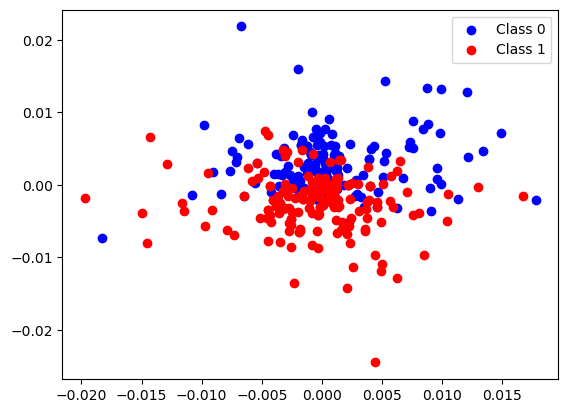

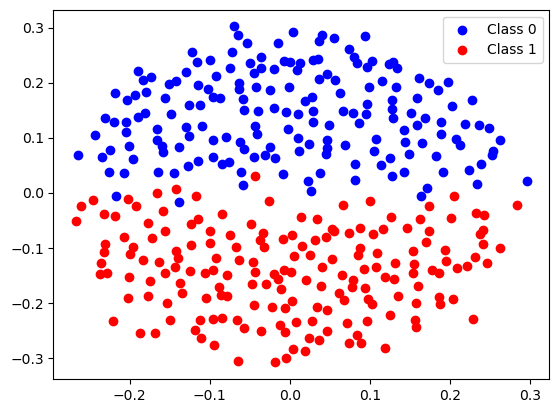

In [152]:
master_sequence = generate_master_sequence(alphabet_size=4, seq_length=150, start_char=68)
n_instances = 200
n_outliers = n_instances//9
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=2,
    cluster_centres_noise=.5,
    n_inliners=n_inliners, 
    n_outliers=0, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=15)

mds_plot(seqs, y=targets, kernel_func=histogram_kernel, param=None)

mds_plot(seqs, y=targets, kernel_func=kmer_kernel, param=3)

## Kernelized Large Margin Classifiers

In this exercise you are asked to develop the code to solve the optimization problem that defines a kernelized Large Margin Classifier with soft margins. 

### Linear case

We need to match the solver's API which, according to the documentation is of the form:

\begin{aligned}
    & \min \frac{1}{2} x^TPx + q^Tx
    \\
     s.t. \ & \ Gx \leq h 
    \\
    & \ Ax = b
\end{aligned}

Recall that the dual problem is expressed as:

\begin{aligned}
\max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)}, x^{(j)}>
\end{aligned}

Let $\mathbf{H}$ be a matrix such that $H_{i,j} = y^{(i)}y^{(j)} <x^{(i)} x^{(j)}>$, then the optimization becomes:

\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. & \ \alpha_i \geq 0 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}

We convert the sums into vector form and multiply both the objective and the constraint by −1 which turns this into a minimization problem and reverses the inequality

\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
    & s.t. \ - \alpha_i \leq 0 
    \\
    & s.t. \ y^T \alpha = 0 
\end{aligned}

We are now ready to convert our numpy arrays into the cvxopt format, using the same notation as in the documentation this gives

* $P:=H$ a matrix of size $m×m$
* $q:=−\vec{1}$  a vector of size $m×1$
* $G:=−diag[1]$ a diagonal matrix of -1s of size $m×m$
* $h:=\vec{0}$ a vector of zeros of size $m×1$
* $A:=y^T$ the label vector of size $1×m$
* $b:=0$ a scalar

Note that in the simple example of $m=2$ the matrix $G$ and vector $h$ which define the constraint are 

$$G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix} \ \ \text{and} \ \ h = \begin{bmatrix} 0 \\ 0  \end{bmatrix}$$

### Computing the matrix $\mathbf{H}$ in vectorized form

Consider the simple example with 2 input samples $\{x^{(1)}, x^{(2)}\} \in \mathbb{R}^2$ which are two dimensional vectors. i.e. $x^{(1)} = (x_1^{(1)} , x_2^{(1)})^T$

$$X = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \end{bmatrix} \ \ \text{and} \ \ y = \begin{bmatrix} y^{(1)}  \\ y^{(2)} \end{bmatrix}$$

We now proceed to creating a new matrix $X′$ where each input sample $x$ is multiplied by the corresponding output label y. This can be done easily in Numpy using vectorization and padding.

$$X' = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix}$$

Finally we take the **matrix multiplication** of $X′$ and its transpose giving $H=X′X′^T$

$$H = X' @ X'^T = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix} \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(2)}_1 y^{(2)}  \\
x^{(1)}_2y^{(1)} & x^{(2)}_2y^{(2)} \end{bmatrix}$$

$$H = \begin{bmatrix}  x^{(1)}_1 x^{(1)}_1y^{(1)}y^{(1)} + x^{(1)}_2x^{(1)}_2y^{(1)}y^{(1)} & x^{(1)}_1 x^{(2)}_1y^{(1)}y^{(2)} + x^{(1)}_2x^{(2)}_2y^{(1)}y^{(2)} \\ x^{(2)}_1 x^{(1)}_1y^{(2)}y^{(1)} + x^{(2)}_2x^{(1)}_2y^{(2)}y^{(1)} & x^{(2)}_1 x^{(2)}_1y^{(2)}y^{(2)} + x^{(2)}_2x^{(2)}_2y^{(2)}y^{(2)} \end{bmatrix}$$


### Soft margin
For the softmax margin SVM, recall that the optimization problem can be expressed as

\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. \ \ & 0 \leq \alpha_i \leq C 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}

which can be written in standard form as

\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
     s.t. & \ - \alpha_i \leq 0 
    \\
     & \alpha_i \leq C
     \\
     &\ y^T \alpha = 0  
\end{aligned}

This is almost the same problem as previously, except for the additional inequality constraint on $\alpha$. We translate this new constraint into standard form by concatenating below matrix $G$ a diagonal matrix of 1s of size $m \times m$. Similarly for the vector $h$ to which the value of $C$ is added $m$ times.

Note that in the simple example of $m=2$ the matrix $G$ and vector $h$ which define the constraint are

$$G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \\ 1 & 0 \\ 0 & 1\end{bmatrix} \ \ \text{and} \ \ h = \begin{bmatrix} 0 \\ 0 \\ C \\ C \end{bmatrix}$$


### Non linear case

What has been written above corresponds to the hard and the soft margin case for a linear large margin classification problem.  

You now need to appy the *kernel trick*, i.e. you need to replace the dot product operations in the input space $<x^{(i)} x^{(j)}>$ with the dot product in the feature space via a kernel function $K(x^{(i)},x^{(j)}) = <\phi(x^{(i)}) \phi(x^{(j)})>$. 

## Question 7

<div style="text-align: right"><b>[25 marks]</b></div>

**Soft Large Margin Kernel Classifier**

**Objective:**
The objective of this assignment is to implement a Soft Large Margin Kernel Classifier (SLMKC) using convex optimization techniques. The SLMKC is a binary classifier that learns decision boundaries by maximizing the margin between classes while allowing for some misclassifications.

**Functions to Implement:**

1. `make_H_k(X, t, kernel_function, param)`
   - **Input:**
     - `X`: Input feature matrix (numpy array or pandas DataFrame).
     - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
     - `kernel_function`: Kernel function used for computing the Gram matrix.
     - `param`: Parameter(s) required by the kernel function.
   - **Output:**
     - Gram matrix H computed using the kernel function.
   - **Description:**
     - Computes the Gram matrix H required for setting up the optimization problem.

2. `setup_optimization_soft_k(X, t, C, kernel_function, param)`
   - **Input:**
     - `X`: Input feature matrix (numpy array or pandas DataFrame).
     - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
     - `C`: Regularization parameter.
     - `kernel_function`: Kernel function used for computing the Gram matrix.
     - `param`: Parameter(s) required by the kernel function.
   - **Output:**
     - Matrices and vectors required for the optimization problem.
   - **Description:**
     - Make the function `P, q, G, h, A, b = setup_optimization_soft_k(X, t, C, kernel_function, param)` to compute the necessary matrices to solve the QP problem associated to the soft margin kernelized classification task using the library [cvxopt](http://cvxopt.org/). The function receives in input a data matrix `X`, an associated target vector `t`, a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 

3. `compute_support_vectors(X, t, alphas)`
   - **Input:**
     - `X`: Input feature matrix (numpy array or pandas DataFrame).
     - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
     - `alphas`: Array of Lagrange multipliers obtained from the optimization.
   - **Output:**
     - Lists containing the support vectors, their corresponding targets, alphas, and indices.
   - **Description:**

Make the function `support_vectors, support_targets, support_alphas, support_ids = compute_support_vectors(X,t,alphas)`  to compute:
- `support_vectors` the support vectors
- `support_targets` the target vector associated to the support vectors
- `support_alphas` the vector of the dual variables $\alpha_i$ associated to the support vectors
- `support_ids` a boolean vector that indicates if a position is associated to a support vector (w.r.t. the original data matrix) (i.e. if the first instance is a support vector and the second one it is not, then `support_ids` = [True, False])

4. `train_slmkc(X, t, C, kernel_function, param)`
   - **Input:**
     - `X`: Input feature matrix (numpy array or pandas DataFrame).
     - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
     - `C`: Regularization parameter.
     - `kernel_function`: Kernel function used for computing the Gram matrix.
     - `param`: Parameter(s) required by the kernel function.
   - **Output:**
     - Lists containing the support vectors, their corresponding targets, alphas, and indices.
   - **Description:**
Make the function `model = train_slmkc(X, t, C, kernel_function, param)` to compute the necessary elements to represent a kernelized soft large margin classifier trained over an input data matrix `X` with an associated target vector `t`, for a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 

Note: you may implement `model` as a tuple containing information on the support vectors and the dual variables, i.e. `model = (support_vectors,support_targets,support_alphas, support_ids)`.

5. `compute_bias(kernel_function, param, C, model)`
   - **Input:**
     - `kernel_function`: Kernel function used for computing the Gram matrix.
     - `param`: Parameter(s) required by the kernel function.
     - `C`: Regularization parameter.
     - `model`: Trained model obtained from `train_slmkc`.
   - **Output:**
     - Bias term computed based on the support vectors.
   - **Description:**
     - Computes the bias term required for making predictions.

Given the kernelized soft large margin discriminant function of the form:
$$ y(x) = \sum_{n \in SV} \alpha_n t_n K(x_n,x) + b $$

and given the encoded `model` to represent the necessary elements for a trained kernelized soft large margin classifier

make the function `b = compute_bias(kernel_function, param, C, model)` to compute the offset/bias term `b`,  for a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 

6. `score_slmkc(X_test, kernel_function, param, C, model)`
   - **Input:**
     - `X_test`: Test feature matrix (numpy array or pandas DataFrame).
     - `kernel_function`: Kernel function used for computing the Gram matrix.
     - `param`: Parameter(s) required by the kernel function.
     - `C`: Regularization parameter.
     - `model`: Trained model obtained from `train_slmkc`.
   - **Output:**
     - Predicted scores for the test instances.
   - **Description:**
     - Computes the decision scores for the test instances using the trained model.

7. `test_slmkc(X_test, kernel_function, param, C, model)`
   - **Input:**
     - `X_test`: Test feature matrix (numpy array or pandas DataFrame).
     - `kernel_function`: Kernel function used for computing the Gram matrix.
     - `param`: Parameter(s) required by the kernel function.
     - `C`: Regularization parameter.
     - `model`: Trained model obtained from `train_slmkc`.
   - **Output:**
     - Predicted class labels for the test instances.
   - **Description:**
     - Makes predictions on the test instances using the trained model.


8. `SoftLargeMarginKernelClassifier` class
   - **Attributes:**
     - `C`: Regularization parameter.
     - `kernel_function`: Function that computes the kernel between two vectors.
     - `param`: Additional parameters needed for the kernel function.
     - `support_vectors`: Support vectors obtained from the training data.
     - `support_targets`: Target labels corresponding to the support vectors.
     - `support_alphas`: Alpha values associated with the support vectors.
     - `support_ids`: Indices of the support vectors in the original training data.
   - **Methods:**
     - `__init__(self, C, kernel_function, param)`: Constructor method to initialize the Soft Large Margin Kernel Classifier with specified parameters.
     - `fit(self, X, y)`: Method to train the classifier on the input training data `X` and labels `y`.
     - `predict(self, X)`: Method to predict labels for the input data `X` using the trained classifier.
     - `decision_function(self, X)`: Method to compute the decision function values for the input data `X`.
     - `predict_proba(self, X)`: Method to compute class probabilities for the input data `X`.

   - **Description:**
     - A class wrapper for the Soft Large Margin Kernel Classifier providing methods for fitting the model to training data, making predictions, computing decision scores, and predicting class probabilities.


**Note:** 
- The SVM classifier is defined for binary classification problems with targets 1 for the positive class and -1 for the negative class.

In [153]:
from cvxopt import matrix
from cvxopt import solvers

def make_H_k(X: list, t: np.ndarray, kernel_function, param) -> np.ndarray:
    """   
    - **Input:**
        - `X`: Input data (of data type compatible with the kernel function).
        - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
        - `kernel_function`: Kernel function used for computing the Gram matrix.
        - `param`: Parameter(s) required by the kernel function.
    - **Output:**
        - Gram matrix H computed using the kernel function.
    - **Description:**
        - Computes the Gram matrix H required for setting up the optimization problem.
     """
    # compute the gram matrix
    H = get_gram_matrix(seqs=X, kernel_func=kernel_function, param=param)
    H = H * np.outer(t, t) 
    # assert type(H) == type(np.array([]))
    return H
    
def setup_optimization_soft_k(X: list, t: np.ndarray, C: float, kernel_function, param) -> tuple:
    """       
    - **Input:**
        - `X`: Input data (of data type compatible with the kernel function).
        - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
        - `C`: Regularization parameter.
        - `kernel_function`: Kernel function used for computing the Gram matrix.
        - `param`: Parameter(s) required by the kernel function.
    - **Output:**
        - Matrices and vectors required for the optimization problem.
    - **Description:**
     - Make the function `P, q, G, h, A, b = setup_optimization_soft_k(X, t, C, kernel_function, param)` to compute the necessary matrices to solve the QP problem 
    associated to the soft margin kernelized classification task using the library [cvxopt](http://cvxopt.org/). The function receives in input a data matrix `X`, 
    an associated target vector `t`, a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 
    
    For hard margin: 
        * $P:=H$ a matrix of size $m*m$
        * $q:=-vec{1}$  a vector of size $m*1$
        * $G:=-diag[1]$ a diagonal matrix of -1s of size $m*m$
        * $h:=vec{0}$ a vector of zeros of size $m*1$
        * $A:=y^T$ the label vector of size $1*m$
        * $b:=0$ a scalar
    For soft margin:
    This is almost the same problem as previously, except for the additional inequality constraint on $alpha$. We translate this new 
    constraint into standard form by concatenating below matrix $G$ a 
    diagonal matrix of 1s of size $m times m$. Similarly for the vector $h$ to which the value of $C$ is added $m$ times.
    """
     # number of data points
    m = len(t)
    
    # kernel matrix
    H = make_H_k(X=X, t=t, kernel_function=kernel_function, param=param)
    
    # Define P, q, G, h, A, b matrices
    P = H
    # assert P.shape == (m, m)

    q = -np.ones((m, 1))
    # assert q.shape == (m, 1)

    G = np.vstack((-np.eye(m), np.eye(m)))
    # assert G.shape == (m*2, m)

    h = np.hstack((np.zeros(m), C*np.ones(m)))
    # print(h.shape)
    # assert h.shape == (m*2, 1)

    A = np.array(t.reshape(1, -1), dtype=np.float64)
    # assert A.shape == (1, m)

    b = np.zeros(1)
    
    # P, q, G, h, A, b
    return matrix(P), matrix(q), matrix(G), matrix(h), matrix(A), matrix(b)


def compute_support_vectors(X: list, t: np.ndarray, alphas) -> tuple:
    """   
    - **Input:**
        - `X`: Input data (of data type compatible with the kernel function).
        - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
        - `alphas`: Array of Lagrange multipliers obtained from the optimization.
    - **Output:**
        - Lists containing the support vectors, their corresponding targets, alphas, and indices.
    - **Description:**

    Make the function `support_vectors, support_targets, support_alphas, support_ids = compute_support_vectors(X,t,alphas)`  to compute:
    - `support_vectors` the support vectors
    - `support_targets` the target vector associated to the support vectors
    - `support_alphas` the vector of the dual variables $\alpha_i$ associated to the support vectors
    - `support_ids` a boolean vector that indicates if a position is associated to a support vector (w.r.t. the original data matrix) 
    (i.e. if the first instance is a support vector and the second one it is not, then `support_ids` = [True, False])
    """

    t = t.reshape(-1, 1).astype(float)
    support_ids = (alphas > 1e-4).flatten()
    support_vectors = list(np.array(X)[support_ids])
    support_targets = t[support_ids]
    support_alphas = alphas[support_ids]

    # assert type(support_ids) == type(np.array([]))
    # assert type(support_vectors) == type([])
    # assert type(support_alphas) == type(np.array([]))
    # assert type(support_targets) == type(np.array([]))



    return support_vectors, support_targets, support_alphas, support_ids

    
def train_slmkc(X: list, t: np.ndarray, C: float, kernel_function, param):
    """   
    - **Input:**
        - `X`: Input feature matrix (numpy array or pandas DataFrame).
        - `t`: Target vector (numpy array or pandas Series) containing the class labels (-1 or 1).
        - `C`: Regularization parameter.
        - `kernel_function`: Kernel function used for computing the Gram matrix.
        - `param`: Parameter(s) required by the kernel function.
    - **Output:**
        - Lists containing the support vectors, their corresponding targets, alphas, and indices.
    - **Description:**
    Make the function `model = train_slmkc(X, t, C, kernel_function, param)` to 
    compute the necessary elements to represent a kernelized soft large margin classifier trained 
    over an input data matrix `X` with an associated target vector `t`, 
    for a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`.

    Note: you may implement `model` as a tuple containing information on the support vectors and the dual variables, 
    i.e. `model = (support_vectors, support_targets, support_alphas, support_ids)`.
    """

    P, q, G, h, A, b = setup_optimization_soft_k(X=X, t=t, C=C, kernel_function=kernel_function, param=param)

    solvers.options['show_progress'] = False
    solvers.options['abstol'] = 1e-10
    solvers.options['reltol'] = 1e-10
    solvers.options['feastol'] = 1e-10
    
    # solve optimization problem
    solution = solvers.qp(P, q, G, h, A, b)
    
    # extract support vectors and dual variables
    alphas = np.array(solution['x'])
    support_vectors, support_targets, support_alphas, support_ids = compute_support_vectors(X=X, t=t, alphas=alphas)

    model = (support_vectors, support_targets, support_alphas, support_ids)
    # assert type(model) == tuple
    return model
    
    
def compute_bias(kernel_function, param, C: float, model) -> float:
    """   
    - **Input:**
        - `kernel_function`: Kernel function used for computing the Gram matrix.
        - `param`: Parameter(s) required by the kernel function.
        - `C`: Regularization parameter.
        - `model`: Trained model obtained from `train_slmkc`.
    - **Output:**
        - Bias term computed based on the support vectors.
    - **Description:**
        - Computes the bias term required for making predictions.
    Given the kernelized soft large margin discriminant function of the form:
    $$ y(x) = \sum_{n \in SV} \alpha_n t_n K(x_n,x) + b $$

    and given the encoded `model` to represent the necessary elements for a trained 
    kernelized soft large margin classifier

    make the function `b = compute_bias(kernel_function, param, C, model)` 
    to compute the offset/bias term `b`,  for a regularization parameter 
    `C` and a kernel function `kernel_function` with parameter `param`.
    """
    # extract necessary information from model tuple
    support_vectors, support_targets, support_alphas, support_ids = model
    n_sv = len(support_vectors)
    bias = 0
    support_vectors_G = get_gram_matrix(seqs=support_vectors, kernel_func=kernel_function, param=param)
    for i in range(n_sv):
        bias += support_targets[i]
        for j in range(n_sv):
            # bias -= support_alphas[j] * support_targets[j] * kernel_function(seq_1 = support_vectors[j], seq_2=support_vectors[i],param=param)
            bias -= support_alphas[j] * support_targets[j] * support_vectors_G[j][i]
    bias /= n_sv

    return bias


def score_slmkc(X_test: list, kernel_function, param, C: float, model) -> np.ndarray:
    """   
    - **Input:**
        - `X_test`: Test feature matrix (numpy array or pandas DataFrame).
        - `kernel_function`: Kernel function used for computing the Gram matrix.
        - `param`: Parameter(s) required by the kernel function.
        - `C`: Regularization parameter.
        - `model`: Trained model obtained from `train_slmkc`.
    - **Output:**
        - Predicted scores for the test instances.
    - **Description:**
        - Computes the decision scores for the test instances using the trained model.
    """
    support_vectors, support_targets, support_alphas, support_ids = model
    n = len(X_test)
    bias = compute_bias(kernel_function=kernel_function, param=param, C=C, model=model)
    decision_scores = np.zeros(n) + bias

    for i in range(n):
        for j in range(len(support_alphas)):
            decision_scores[i] += support_alphas[j] * support_targets[j] * kernel_function(seq_1 = X_test[i], seq_2 = support_vectors[j], param=param)

    # assert type(decision_scores) == type(np.array([]))
    return decision_scores

def test_slmkc(X_test: list, kernel_function, param, C: float, model) -> np.ndarray:
    """
    - **Input:**
        - `X_test`: Test feature matrix (numpy array or pandas DataFrame).
        - `kernel_function`: Kernel function used for computing the Gram matrix.
        - `param`: Parameter(s) required by the kernel function.
        - `C`: Regularization parameter.
        - `model`: Trained model obtained from `train_slmkc`.
    - **Output:**
        - Predicted class labels for the test instances.
    - **Description:**
        - Makes predictions on the test instances using the trained model.
    """
    scores = score_slmkc(X_test=X_test, kernel_function=kernel_function, param=param, C=C, model=model)
    # assert type(np.sign(scores)) == type(np.array([]))
    return np.sign(scores)

class SoftLargeMarginKernelClassifier(object):
    """   
    - **Attributes:**
        - `C`: Regularization parameter.
        - `kernel_function`: Function that computes the kernel between two vectors.
        - `param`: Additional parameters needed for the kernel function.
        - `support_vectors`: Support vectors obtained from the training data.
        - `support_targets`: Target labels corresponding to the support vectors.
        - `support_alphas`: Alpha values associated with the support vectors.
        - `support_ids`: Indices of the support vectors in the original training data.
    - **Methods:**
        - `__init__(self, C, kernel_function, param)`: Constructor method to initialize 
     the Soft Large Margin Kernel Classifier with specified parameters.
        - `fit(self, X, y)`: Method to train the classifier on the input training data `X` and labels `y`.
        - `predict(self, X)`: Method to predict labels for the input data `X` using the trained classifier.
        - `decision_function(self, X)`: Method to compute the decision function values for the input data `X`.
        - `predict_proba(self, X)`: Method to compute class probabilities for the input data `X`.

    - **Description:**
        - A class wrapper for the Soft Large Margin Kernel Classifier providing methods for fitting the 
     model to training data, making predictions, computing decision scores, and predicting class probabilities.
    """
    def __init__(self, C: float, kernel_function, param) -> None:
        self.C = C
        self.kernel_function = kernel_function
        self.param = param
        self.support_vectors = None
        self.support_targets = None
        self.support_alphas = None
        self.support_ids = None
        self.classes_ = []
   
    def fit(self, X: list, y: np.ndarray) -> None:
        self.classes_ = np.unique(y)
        y = np.array(y)
        y_train = y.copy()
        y_train[y_train == min(self.classes_)] = -1
        y_train[y_train == max(self.classes_)] = 1
 
        model = train_slmkc(X=X, t=y_train, C=self.C, kernel_function=self.kernel_function, param=self.param)
        self.support_vectors, self.support_targets, self.support_alphas, self.support_ids = model
        # assert type(self.support_ids) == type(np.array([]))
        # assert type(self.support_vectors) == type([])
        # assert type(self.support_alphas) == type(np.array([]))
        # assert type(self.support_targets) == type(np.array([]))
        
    def predict(self, X: list) -> np.ndarray:
        preds = test_slmkc(X_test=X, kernel_function=self.kernel_function, param=self.param, C=self.C, model=(self.support_vectors, self.support_targets, self.support_alphas, self.support_ids))
        preds[preds==1] = self.classes_[1]
        preds[preds==-1] = self.classes_[0]
        return preds
    
    def decision_function(self, X: list) -> np.ndarray:
        return score_slmkc(X_test=X, kernel_function=self.kernel_function, param=self.param, C=self.C, model=(self.support_vectors, self.support_targets, self.support_alphas, self.support_ids))

    def predict_proba(self, X: list) -> np.ndarray:
        scores = score_slmkc(X_test=X, kernel_function=self.kernel_function, param=self.param, C=self.C, model=(self.support_vectors, self.support_targets, self.support_alphas, self.support_ids))
        return 1 / (1 + np.exp(-scores))

save_history()

In [154]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [155]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [156]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [157]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [158]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [159]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [160]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [161]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [162]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [163]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 8

<div style="text-align: right"><b>[5 marks]</b></div>

**2D Sequence Plotting**

**Objective:**
The objective of this assignment is to implement a function for visualizing sequences in a 2-dimensional space using Multi-Dimensional Scaling (MDS). The function should allow for visualization of sequences along with optional additional features such as true labels, predicted labels, and support vectors.

**Function to Implement:**

1. `plot_seq_2d(seqs, y=None, preds=None, is_support=None, kernel_func=None, param=None)`
   - **Input:**
     - `seqs`: List of sequences to be plotted.
     - `y`: True labels corresponding to the sequences (optional).
     - `preds`: Predicted labels corresponding to the sequences (optional).
     - `is_support`: Boolean array indicating whether a sequence is a support vector (optional).
     - `kernel_func`: Kernel function used for computing the Gram matrix (optional).
     - `param`: Parameter(s) required by the kernel function (optional).
   - **Output:**
     - None
   - **Description:**
     - Visualizes the sequences in a 2-dimensional space using Multi-Dimensional Scaling (MDS).
     - Optionally, displays true labels (`y`), predicted labels (`preds`), and support vectors (`is_support`).
     - Points representing sequences are colored based on the true labels (`y`).
     - If `preds` and `y` are provided, misclassified instances are highlighted with 'X' markers.
     - If `is_support` is provided, support vectors are indicated with smaller points with a black border.

**Additional Notes:**
- The function should utilize the provided `get_gram_matrix` and `gram_matrix_to_distance_matrix` functions to compute the Gram matrix and distance matrix, respectively.
- Ensure the visualization is clear and informative, with appropriate labeling and coloring of data points.
- See the Checkpoint for an example of what the output should look like.


In [164]:
from sklearn.manifold import MDS

def plot_seq_2d(seqs: list, y: np.ndarray=None, preds: np.ndarray=None, is_support:np.ndarray=None, kernel_func=None, param=None) -> None:

    """   
    - **Input:**
        - `seqs`: List of sequences to be plotted.
        - `y`: True labels corresponding to the sequences (optional).
        - `preds`: Predicted labels corresponding to the sequences (optional).
        - `is_support`: Boolean array indicating whether a sequence is a support vector (optional).
        - `kernel_func`: Kernel function used for computing the Gram matrix (optional).
        - `param`: Parameter(s) required by the kernel function (optional).
    - **Output:**
        - None
    - **Description:**
        - Visualizes the sequences in a 2-dimensional space using Multi-Dimensional Scaling (MDS).
        - Optionally, displays true labels (`y`), predicted labels (`preds`), and support vectors (`is_support`).
        - Points representing sequences are colored based on the true labels (`y`).
        - If `preds` and `y` are provided, misclassified instances are highlighted with 'X' markers.
        - If `is_support` is provided, support vectors are indicated with smaller points with a black border.
    """
    if y is not None:
        y = np.array(y)
    G = get_gram_matrix(seqs=seqs, kernel_func=kernel_func, param=param)
    dist_mat = gram_matrix_to_distance_matrix(G=G)
    embedding = MDS(n_components=2, dissimilarity="precomputed")
    X_2d = embedding.fit_transform(dist_mat)

    fig, ax = plt.subplots()

    if y is not None and preds is None and is_support is None:
        class_labels = np.unique(y)
        if len(class_labels) == 2:
            colors = []
            for i in y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(X_2d[:,0], X_2d[:, 1], color=colors)
        else:
            ax.scatter(X_2d[:,0], X_2d[:, 1], c = y)
        ax.set_title(f"{len(seqs)} instances")

    elif y is None and preds is None and is_support is not None:

        support_vectors_X = X_2d[is_support]
        ax.scatter(support_vectors_X[:,0], support_vectors_X[:, 1], s = 35, edgecolor="black", c = "b")

        not_support_vectors_X = X_2d[~is_support]
        ax.scatter(not_support_vectors_X[:,0], not_support_vectors_X[:, 1], s = 50, c = "b")

        ax.set_title(f"{len(seqs)} instances, {np.sum(is_support)} SUPPORT VECTORS ({np.round(100*np.sum(is_support) / len(seqs), 2)}%)")
        return 
    
    elif y is not None and preds is not None and is_support is None:
        class_labels = np.unique(y)

        if len(class_labels) == 2:
            mistakes_mask = np.where(y!=preds)
            mistakes_X = X_2d[mistakes_mask]
            mistakes_y = y[mistakes_mask]

            colors = []
            for i in mistakes_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(mistakes_X[:,0], mistakes_X[:, 1], s = 50, color = colors, marker="X")

            not_mistakes_mask = np.where(y==preds)
            not_mistakes_X = X_2d[not_mistakes_mask]
            not_mistakes_y = y[not_mistakes_mask]

            colors = []
            for i in not_mistakes_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(not_mistakes_X[:,0], not_mistakes_X[:, 1], s = 50, color = colors)

        else:
            mistakes_mask = np.where(y!=preds)
            mistakes_X = X_2d[mistakes_mask]
            mistakes_y = y[mistakes_mask]
            ax.scatter(mistakes_X[:,0], mistakes_X[:, 1], s = 50, c = mistakes_y, marker="X")

            not_mistakes_mask = np.where(y==preds)
            not_mistakes_X = X_2d[not_mistakes_mask]
            not_mistakes_y = y[not_mistakes_mask]
            ax.scatter(not_mistakes_X[:,0], not_mistakes_X[:, 1], s = 50, c = not_mistakes_y)

        ax.set_title(f"{len(seqs)} instances, {np.sum(y!=preds)} MISTAKES ({np.round(100*np.sum(y!=preds) / len(seqs), 2)}%)")

    elif y is not None and preds is None and is_support is not None:
        class_labels = np.unique(y)
        if len(class_labels) == 2:
            support_vectors_X = X_2d[is_support]
            support_vectors_y = y[is_support]
            colors = []
            for i in support_vectors_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(support_vectors_X[:,0], support_vectors_X[:, 1], s = 35, edgecolor="black", color=colors)

            not_support_vectors_X = X_2d[~is_support]
            not_support_vectors_y = y[~is_support]
            colors = []
            for i in not_support_vectors_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(not_support_vectors_X[:,0], not_support_vectors_X[:, 1], s = 50, color=colors)

        else:
            support_vectors_X = X_2d[is_support]
            support_vectors_y = y[is_support]
            ax.scatter(support_vectors_X[:,0], support_vectors_X[:, 1], s = 35, edgecolor="black", c = support_vectors_y)

            not_support_vectors_X = X_2d[~is_support]
            not_support_vectors_y = y[~is_support]
            ax.scatter(not_support_vectors_X[:,0], not_support_vectors_X[:, 1], s = 50, c=not_support_vectors_y)

        ax.set_title(f"{len(seqs)} instances, {np.sum(is_support)} SUPPORT VECTORS ({np.round(100*np.sum(is_support) / len(seqs), 2)}%)")


    elif y is not None and preds is not None and is_support is not None:
        class_labels = np.unique(y)
        if len(class_labels) == 2:
            mistakes_mask = y != preds
            mistakes_support_vectors_X = X_2d[mistakes_mask & is_support] 
            mistakes_support_vectors_y = y[mistakes_mask & is_support]
            colors = []
            for i in mistakes_support_vectors_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(mistakes_support_vectors_X[:,0], mistakes_support_vectors_X[:,1], color = colors, s = 35, edgecolor="black", marker = "X")

            not_mistakes_support_vectors_X =  X_2d[~mistakes_mask & is_support] 
            not_mistakes_support_vectors_y =  y[~mistakes_mask & is_support] 
            colors = []
            for i in not_mistakes_support_vectors_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(not_mistakes_support_vectors_X[:,0], not_mistakes_support_vectors_X[:,1], color = colors, s = 35, edgecolor="black")

            mistakes_not_support_vectors_X = X_2d[mistakes_mask & ~is_support] 
            mistakes_not_support_vectors_y = y[mistakes_mask & ~is_support] 
            colors = []
            for i in mistakes_not_support_vectors_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")            
            ax.scatter(mistakes_not_support_vectors_X[:,0], mistakes_not_support_vectors_X[:,1], color=colors, s = 50, marker = "X")

            not_mistakes_not_support_vectors_X = X_2d[~mistakes_mask & ~is_support] 
            not_mistakes_not_support_vectors_y = y[~mistakes_mask & ~is_support]
            colors = []
            for i in not_mistakes_not_support_vectors_y:
                if i == class_labels[0]:
                    colors.append("blue")
                if i == class_labels[1]:
                    colors.append("red")
            ax.scatter(not_mistakes_not_support_vectors_X[:,0], not_mistakes_not_support_vectors_X[:,1], color = colors, s = 50)            

        else:
            mistakes_mask = y != preds
            
            mistakes_support_vectors_X = X_2d[mistakes_mask & is_support] 
            mistakes_support_vectors_y = y[mistakes_mask & is_support]
            ax.scatter(mistakes_support_vectors_X[:,0], mistakes_support_vectors_X[:,1], c = mistakes_support_vectors_y, s = 35, edgecolor="black", marker = "X")

            not_mistakes_support_vectors_X =  X_2d[~mistakes_mask & is_support] 
            not_mistakes_support_vectors_y =  y[~mistakes_mask & is_support] 
            ax.scatter(not_mistakes_support_vectors_X[:,0], not_mistakes_support_vectors_X[:,1], c = not_mistakes_support_vectors_y, s = 35, edgecolor="black")

            mistakes_not_support_vectors_X = X_2d[mistakes_mask & ~is_support] 
            mistakes_not_support_vectors_y = y[mistakes_mask & ~is_support] 
            ax.scatter(mistakes_not_support_vectors_X[:,0], mistakes_not_support_vectors_X[:,1], c = mistakes_not_support_vectors_y, s = 50, marker = "X")

            not_mistakes_not_support_vectors_X = X_2d[~mistakes_mask & ~is_support] 
            not_mistakes_not_support_vectors_y = y[~mistakes_mask & ~is_support]
            ax.scatter(not_mistakes_not_support_vectors_X[:,0], not_mistakes_not_support_vectors_X[:,1], c = not_mistakes_not_support_vectors_y, s = 50)

        ax.set_title(f"{len(seqs)} instances, {np.sum(mistakes_mask)} MISTAKES ({np.round(100*np.sum(y!=preds) / len(seqs), 2)}%), {np.sum(is_support)} SUPPORT VECTORS ({np.round(100*np.sum(is_support) / len(seqs), 2)}%)")

    elif y is None and preds is None and is_support is None:
        ax.scatter(X_2d[:,0], X_2d[:, 1])
        ax.set_title(f"{len(seqs)} instances")

    plt.show() 
    

save_history()

In [165]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
master_sequence = generate_master_sequence(alphabet_size=5, seq_length=30, start_char=68)
n_instances = 200
n_outliers = n_instances//5
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=2,
    cluster_centres_noise=.3,
    n_inliners=n_inliners, 
    n_outliers=n_outliers, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=5)

param = 3
y = np.array(targets)
y[y==0]=-1

from sklearn.model_selection import train_test_split
train_seqs, test_seqs, train_y, test_y = train_test_split(seqs,y, train_size=.5)

est = SoftLargeMarginKernelClassifier(C=1e0, kernel_function=kmer_kernel, param=param)
est.fit(train_seqs, train_y)

preds = est.predict(train_seqs)
plot_seq_2d(train_seqs, y=train_y, preds=preds, is_support=est.support_ids, kernel_func=kmer_kernel, param=param)

preds = est.predict(test_seqs)
plot_seq_2d(test_seqs, y=test_y, preds=preds, kernel_func=kmer_kernel, param=param)
```

and check that you obtain a plot similar to:

<img src="img2.png" width=40%>


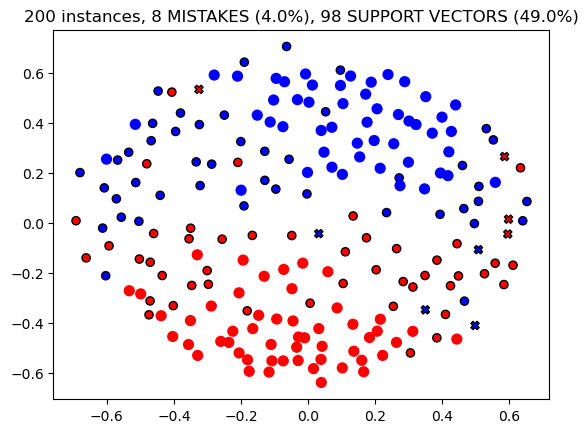

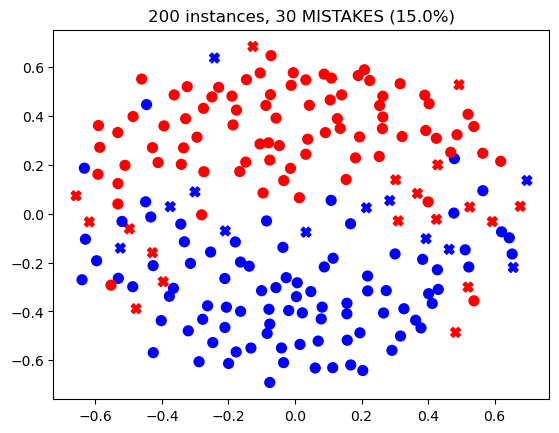

In [166]:
master_sequence = generate_master_sequence(alphabet_size=5, seq_length=30, start_char=68)
n_instances = 200
n_outliers = n_instances//5
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=2,
    cluster_centres_noise=.3,
    n_inliners=n_inliners, 
    n_outliers=n_outliers, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=5)

param = 3
y = np.array(targets)
y[y==0]=-1

from sklearn.model_selection import train_test_split
train_seqs, test_seqs, train_y, test_y = train_test_split(seqs,y, train_size=.5)

est = SoftLargeMarginKernelClassifier(C=1e0, kernel_function=kmer_kernel, param=param)
est.fit(train_seqs, train_y)

preds = est.predict(train_seqs)
plot_seq_2d(train_seqs, y=train_y, preds=preds, is_support=est.support_ids, kernel_func=kmer_kernel, param=param)

preds = est.predict(test_seqs)
plot_seq_2d(test_seqs, y=test_y, preds=preds, kernel_func=kmer_kernel, param=param)

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
master_sequence = generate_master_sequence(alphabet_size=5, seq_length=30, start_char=68)
n_instances = 100
n_outliers = n_instances//5
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=3,
    cluster_centres_noise=.3,
    n_inliners=n_inliners, 
    n_outliers=n_outliers, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=5)

mds_plot(seqs, y=targets, kernel_func=kmer_kernel, param=3)

seqs_train, seqs_test, targets_train, targets_test = train_test_split(seqs, targets, test_size=0.33, shuffle=True, random_state=0)
estimator = SoftLargeMarginKernelClassifier(C=1e0, kernel_function=kmer_kernel, param=3)
est = OVOClassifier(estimator=estimator)
est.fit(seqs_train, targets_train)
preds = est.predict(seqs_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(targets_test, preds)
print('Predictive accuracy: %.2f'%acc)
```

and check that you obtain a plot similar to:

<img src="img4.png" width=40%>


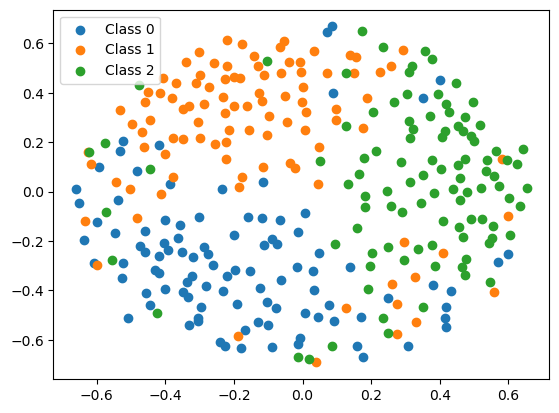

Predictive accuracy: 0.80


In [167]:
master_sequence = generate_master_sequence(alphabet_size=5, seq_length=30, start_char=68)
n_instances = 100
n_outliers = n_instances//5
n_inliners = n_instances - n_outliers
seqs, targets = make_data(
    master_sequence, 
    n_clusters=3,
    cluster_centres_noise=.3,
    n_inliners=n_inliners, 
    n_outliers=n_outliers, 
    inliner_noise=.15, 
    outlier_noise=.99, 
    endpoint_trim_dim=5)

mds_plot(seqs, y=targets, kernel_func=kmer_kernel, param=3)

seqs_train, seqs_test, targets_train, targets_test = train_test_split(seqs, targets, test_size=0.33, shuffle=True, random_state=0)
estimator = SoftLargeMarginKernelClassifier(C=1e0, kernel_function=kmer_kernel, param=3)
est = OVOClassifier(estimator=estimator)
est.fit(seqs_train, targets_train)
preds = est.predict(seqs_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(targets_test, preds)
print('Predictive accuracy: %.2f'%acc)

---

In [168]:
# Do not consider the next cell.
# You do not have to do anything for the next cell.

In [169]:
check_and_prepare_for_submission()

The notebook and the history are ready for sumbission.
The following archive has been created in the parent directory with name: ecmm422ca2.zip


---